# Lender Arthetypes of Kiva.org


## Conclusions
1. Segments of lenders



## Outline of this notebook

1. Data loading and processing
2. Dimensionality reduction
3. Clustering
4. Interpretations

## 1. Data 

### 1.1 loading and labeling

In [4]:
from lender_main import *

In [5]:
from fulldata_pipeline_0811 import *

In [6]:
from ploting import *

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
# plt.style.use('ggplot')
%load_ext autoreload
%autoreload 2
pd.options.display.max_rows = 999

In [8]:
from model import *

In [9]:
df = read_full_data()

In [31]:
df.shape

(2945384, 105)

### 1.2 EDA

### 1.3 Labeling outliers

In [10]:
df = create_lenders_labels(df)

In [11]:
df.shape

(2945384, 109)

In [12]:
normal = df[~df['dollar_outliers?']][~df['team_outliers?']][~df['comments_outliers?']][~df['dollar_zeros?']]

In [13]:
normal.shape

(1017355, 109)

In [14]:
normal.shape[0]/df.shape[0]

0.34540657516982504

In [15]:
df['dollar_outliers?'].sum()/df.shape[0]

0.27243171009280964

In [16]:
df['team_outliers?'].sum()/df.shape[0]

0.02695030597029114

In [17]:
df['comments_outliers?'].sum()/df.shape[0]

0.010218362020028628

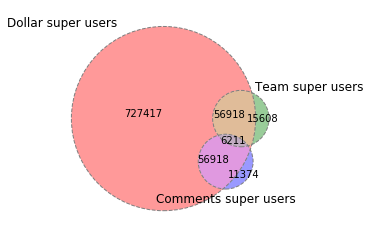

In [27]:
plot_venn_3(802416,79379,30097,63129,18081,6853,6211,a_label="Dollar super users",b_label="Team super users",c_label="Comments super users")

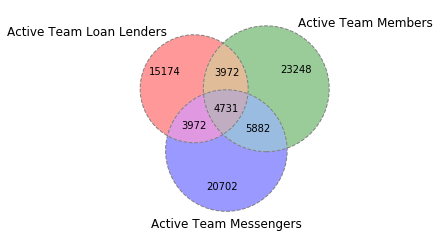

In [34]:
plot_venn_3(29547,37833,36985,8703,10401,10613,4731,'Active Team Loan Lenders',"Active Team Members",'Active Team Messengers')

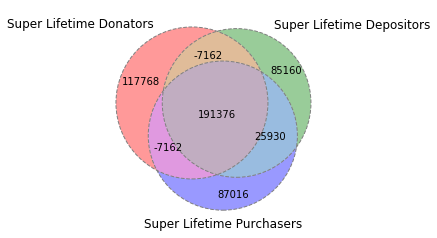

In [35]:
plot_venn_3(301982,295304,304322,184214,191376,217306,191376,"Super Lifetime Donators","Super Lifetime Depositors","Super Lifetime Purchasers")

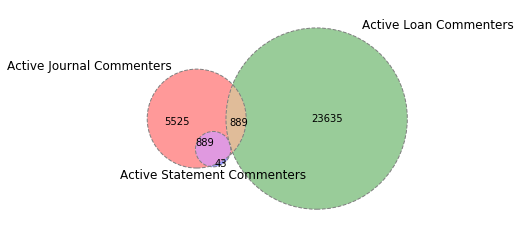

In [28]:
plot_venn_3(6417,24526,48,889,3,2,0,"Active Journal Commenters","Active Loan Commenters","Active Statement Commenters")

## 2. Feature Engineering and Dimensionality Reduction

In [18]:
ndf_ww, X_ww = feature_engineer(normal,drop_loan_preference=True,drop_first_loan_region=True,drop_loan_regions=True)

In [19]:
ndf_ww.shape

(1017355, 59)

In [20]:
re_X_ww, imp_f_ww = PCA_reduce(X_ww,6)

#0 Principle Component top 5 contributors are: [11 14  9 17 38]
#1 Principle Component top 5 contributors are: [33 23 35 10 18]
#2 Principle Component top 5 contributors are: [13 21 47 54 39]
#3 Principle Component top 5 contributors are: [20 40 13 21  2]
#4 Principle Component top 5 contributors are: [16 50 49 15 37]
#5 Principle Component top 5 contributors are: [ 8 36  2 33  0]
Reduced X shape: (1017355, 6)
Explained variance: [8.43050318 4.76182112 3.7101418  2.91599202 2.44427205 2.14420449]
Explained variance ratio: [0.17205092 0.09717993 0.07571711 0.05950998 0.04988305 0.04375923]
Explained variance ratio accumulated: [0.17205092 0.26923084 0.34494795 0.40445793 0.45434099 0.49810022]


In [22]:
x = range(1,11)
y = '0.17205092 0.26923086 0.3449483 0.40445871 0.45433859 0.4981059 0.53662904 0.56939238 0.59339454 0.6163065'.split(' ')
z = []
for i in y:
    z.append(float(i[:4]))

Text(0,0.5,'Accumulated Explained Variance')

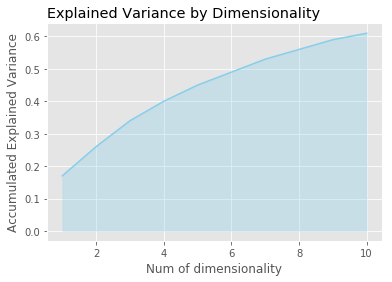

In [23]:
# get seaborn
# import seaborn as sns
 
# Make the same graph
plt.fill_between( x, z, color="skyblue", alpha=0.3)
plt.plot(x, z, color="skyblue")
 
# Add titles
plt.title("Explained Variance by Dimensionality", loc="left")
plt.xlabel("Num of dimensionality")
plt.ylabel("Accumulated Explained Variance")


In [21]:
counter = print_imp_features(ndf_ww,imp_f_ww)

#1 PC:
FIRST_YEAR_DONATION_TOTAL
FIRST_DAY_DEPOSIT_TOTAL
FIRST_YEAR_DEPOSIT_TOTAL
FIRST_YEAR_DEPOSIT_OCCASION_NUM
FIRST_TIME_DEPOSITOR_REPORTING_CATEGORY_none
#2 PC:
last_login_today_months
NUM_TEAM_LOANS
ave_loan_purchase_per_month
FIRST_YEAR_LOAN_PURCHASE_TOTAL
FIRST_YEAR_LOAN_PURCHASE_OCCASION_NUM
#3 PC:
FIRST_YEAR_EMAIL_REFERRAL_LOAN_PURCHASE_TOTAL
FIRST_YEAR_EMAIL_REFERRAL_LOAN_PURCHASE_OCCASION_NUM
FIRST_TRANSACTION_REFERRAL_unknown
FIRST_BASKET_CATEGORY_Kiva Card Redeemer
FIRST_TRANSACTION_REFERRAL_giftcard
#4 PC:
FIRST_YEAR_EMAIL_REFERRAL_DONATION_OCCASION_NUM
FIRST_TRANSACTION_REFERRAL_invited
FIRST_YEAR_EMAIL_REFERRAL_LOAN_PURCHASE_TOTAL
FIRST_YEAR_EMAIL_REFERRAL_LOAN_PURCHASE_OCCASION_NUM
IS_FREE_TRIAL_USER
#5 PC:
FIRST_DAY_DONATION_TOTAL
FIRST_BASKET_CATEGORY_Depositor - Lender Donor
FIRST_BASKET_CATEGORY_Depositor - Kiva Card NonDonor
FIRST_DAY_LOAN_PURCHASE_TOTAL
FIRST_TIME_DEPOSITOR_REPORTING_CATEGORY_kiva
#6 PC:
LIFETIME_LENDER_WEIGHTED_AVERAGE_LOAN_TERM
FIRST_TIME_DEPO

In [43]:
re_X_6 = re_X_ww[:,:6]

In [22]:
re_X_3 = re_X_ww[:,:3]

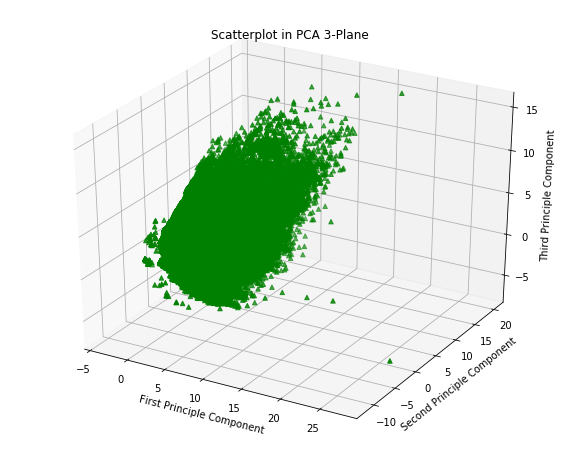

In [54]:
matplotlib_3D_X_reduced(re_X_3)

## 3. Kmeans ++ Clustering 

In [31]:
y3, centers3 = kmeans_cluster(re_X_3,6)

In [30]:
y, centers = kmeans_cluster(re_X_ww,6)

In [46]:
y

array([5, 2, 2, ..., 1, 2, 2], dtype=int32)

In [47]:
centers

array([[-0.51569118, -1.51230718,  2.96460409, -1.30027385, -0.23171639,
        -0.55939987],
       [-2.6992891 ,  1.35373155, -1.04548186, -0.38959631,  0.23520335,
        -0.27268566],
       [ 3.36502455,  0.59919692, -0.87927603, -0.53109972, -0.93819346,
         0.24738011],
       [ 5.14482909,  5.04868197,  4.24311314,  5.40662827,  1.6060545 ,
        -1.75313598],
       [-2.21106715, -0.95177702, -0.09999417,  2.3855375 , -0.38821969,
         1.48479979],
       [ 3.361019  , -3.44145436, -1.90643245,  0.42540203,  3.27283163,
        -0.6236981 ]])

In [48]:
ndf_ww['clustering_6d'] = y

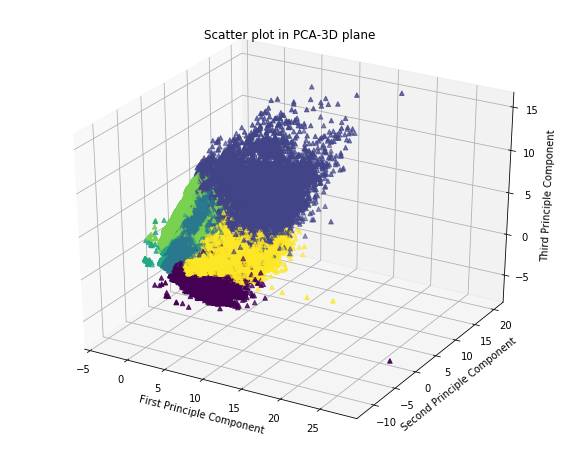

In [52]:
plot_3D_kmeans(re_X_3,y,"First Principle Component","Second Principle Component","Third Principle Component",'Scatter plot in PCA-3D plane')

In [58]:
y_plotly = [-6.659581961000001,
        -5.089488493,
        -4.378679438,
        -5.295157615,
        -5.650204639,
        -5.342582212,
        -2.6593851,
        -5.980447143999999,
        -7.354333132000001,
        -4.940739752,
        -6.088279797999999,
        -3.9312108739999996,
        -5.719610226,
        -3.824571254,
        -3.958288908,
        -3.262213875,
        -5.177693706,
        -5.215094552,
        -5.754747784,
        -4.812824737,
        -5.260676328,
        -5.913119752,
        -2.9459681439999996,
        -5.146441822,
        -4.442775017,
        -4.4045388160000005,
        -2.814705755,
        -5.219504218,
        -4.65277168,
        -5.119400935,
        -6.944816512999999,
        -3.6385185539999996,
        -3.629695696,
        -6.032320896,
        -4.653982463,
        -5.314287755,
        -3.221736375,
        -4.68985236,
        -4.82059606,
        -6.665328122999999,
        -3.203365998,
        -2.930502315,
        -4.403076921,
        -1.763394264,
        -2.441374062,
        -1.6118483259999998,
        -2.146141648,
        -1.057849942,
        -3.0188310780000003,
        -2.111353825,
        -2.883544053,
        -1.137664637,
        -2.927659102,
        -1.899373505,
        -3.445301812,
        -4.377205684,
        -1.807644254,
        -3.977937083,
        -2.004394559,
        -2.603614131,
        0.07746436799999999,
        -1.4480551119999998,
        -1.951087367,
        -1.157814918,
        -2.129069548,
        -1.557117221,
        -1.372865298,
        -3.090812025,
        -2.4796127930000003,
        -1.9974237069999998,
        0.368203894,
        -2.644444308,
        -1.65958521,
        -1.7829594930000001,
        -2.152608232,
        -2.671200546,
        -1.2223218679999999,
        -2.723413255,
        -1.6470187040000002,
        -1.701792056,
        1.3938729369999998,
        1.2705114240000002,
        -0.108615459,
        0.237129394,
        -0.616072541,
        1.282457591,
        0.8133288009999999,
        0.09147491699999999,
        1.458351207,
        0.43565717600000003,
        0.5292945029999999,
        0.159547956,
        0.419158908,
        -0.449284629,
        1.14256644,
        2.319581855,
        1.09419702,
        1.680289029,
        0.9112872009999999,
        1.448985496,
        1.447871374,
        1.9913868209999999,
        1.101976769,
        0.542596848,
        0.383206991,
        3.183045336,
        1.917018745,
        0.19443542,
        0.9573879790000001,
        -0.22641822,
        2.706298233,
        0.29878293100000003,
        0.405875197,
        -0.383323371,
        1.70678256,
        1.216784515,
        2.292606475,
        0.60483975,
        0.392721095,
        1.440556657]

In [59]:
x_plotly = [
        -5.933556482999999,
        -5.6996208070000005,
        -5.650399316000001,
        -5.526565548,
        -6.368754051,
        -6.140579977000001,
        -4.452856335,
        -6.5908158420000005,
        -4.900621232,
        -6.776358598,
        -3.299248823,
        -6.151185467,
        -3.9204125110000003,
        -5.765200219,
        -5.743341432999999,
        -6.046696429,
        -4.551326722,
        -4.851285838,
        -4.950603329,
        -5.142530565,
        -6.151635992,
        -3.795200489,
        -3.9397209060000002,
        -6.098026972,
        -6.057979511,
        -5.60314939,
        -6.046424695,
        -5.283640654,
        -5.31684222,
        -3.7075763619999997,
        -4.304464199,
        -5.658020631,
        -5.469346184,
        -5.539729187000001,
        -5.764965407,
        -5.496557763999999,
        -5.281293709,
        -5.3941382760000005,
        -4.575662847,
        -4.876414383,
        -0.6926033109999999,
        0.77775568,
        0.9764644659999999,
        -0.223574148,
        2.312929251,
        0.9357635679999999,
        1.73830554,
        2.450414159,
        0.866561957,
        2.897334565,
        2.8929951789999997,
        0.6227184339999999,
        1.234091667,
        3.036598565,
        2.143298808,
        0.051100665999999996,
        0.8468152529999999,
        1.7120042180000001,
        2.417712026,
        0.566564258,
        1.6335953380000001,
        1.591308795,
        1.367253651,
        0.39276816700000006,
        3.075062581,
        1.212757701,
        2.4044164269999997,
        1.5732267690000001,
        2.410314499,
        0.7095289929999999,
        1.874426854,
        0.8636630679999999,
        3.3340797610000004,
        3.0130443610000004,
        0.554351629,
        0.094579789,
        2.6997700119999997,
        0.776099832,
        3.042749544,
        3.2594190380000003,
        -4.46256209,
        -2.404911822,
        -3.2072769689999996,
        -2.7706174789999998,
        -2.8677973810000004,
        -3.3785943730000003,
        -3.084490031,
        -3.4914736239999997,
        -3.827917198,
        -3.24428938,
        -2.98709859,
        -3.1070619539999997,
        -4.849372961,
        -3.743601917,
        -0.511499257,
        -3.780286652,
        -3.081478096,
        -1.9061311109999999,
        -2.195100435,
        -3.03376777,
        -3.0590881739999998,
        -2.392182731,
        -3.1160598680000002,
        -4.132695274,
        -3.8380168169999997,
        -2.984436052,
        -2.418275557,
        -4.641404802,
        -2.039125962,
        -1.5691393,
        -5.136807296000001,
        -2.590161888,
        -3.898071077,
        -3.04494618,
        -1.510053312,
        -3.5082516260000003,
        -4.413845846,
        -4.893555925,
        -1.833977721,
        -4.570476949
      ]

In [60]:
z_plotly = [
        -2.337235019,
        -2.206948738,
        -2.672845545,
        -1.849260083,
        -1.165898125,
        -0.778542368,
        0.17068472199999998,
        -0.893578141,
        -1.86284755,
        -2.099077165,
        -1.921433682,
        -3.273532327,
        -1.330971338,
        -1.989789344,
        -2.527912406,
        -2.5459933169999998,
        -4.356211086,
        -1.01613089,
        -3.1769933189999997,
        -1.930090004,
        -2.533510807,
        -2.525239279,
        -1.53400248,
        0.17279623100000002,
        -2.2290568040000003,
        -0.9655103509999999,
        -0.573559326,
        -3.46641019,
        -2.321577198,
        -2.539822425,
        -1.9929827230000001,
        -2.703703637,
        -2.876255635,
        -1.516399566,
        -4.42835353,
        -1.944974832,
        -3.191132723,
        -2.984037185,
        -1.4438358669999998,
        -1.619853479,
        2.369350747,
        2.769025922,
        4.560652278,
        3.613634463,
        2.9993920239999996,
        1.657828382,
        3.7532695780000003,
        3.426547531,
        3.66623876,
        3.322088355,
        3.620197843,
        2.0555818130000003,
        4.186552216,
        3.7418104810000004,
        4.409862791,
        3.03332339,
        3.0159159460000002,
        3.247796449,
        5.29907106,
        4.0131887410000004,
        3.9268579339999996,
        4.349738474,
        2.775606123,
        4.639586171,
        4.3063515510000006,
        4.35760831,
        5.783969525,
        4.558333755,
        2.480747884,
        3.794639102,
        3.222707703,
        2.484994561,
        4.562827004,
        3.6982552330000003,
        2.46832464,
        4.932737637,
        3.2976685519999998,
        2.250379546,
        4.791857211,
        3.574014415,
        6.665308837,
        7.313108665,
        4.908126901,
        8.059446486,
        6.543892621,
        3.9729016789999996,
        3.5667003680000002,
        3.745310332,
        5.710399863999999,
        4.479924924,
        4.801578703000001,
        4.487399648999999,
        6.643217845,
        6.079235262,
        4.565121862,
        5.55947255,
        5.66653557,
        6.703933662000001,
        4.048203506,
        5.3828291120000005,
        6.033514094,
        6.059465192,
        6.37690679,
        5.07976417,
        4.706271284,
        5.448591293,
        5.711893685,
        5.652637669,
        3.6969407480000003,
        4.770163123000001,
        5.7536952139999995,
        4.844998262,
        5.055171486,
        6.781520605,
        7.781083156,
        5.974418618,
        5.587932306,
        6.345619786,
        4.799810425,
        5.739028492999999
      ]

In [62]:
y2_p = [
        -6.659581961000001,
        -5.089488493,
        -4.378679438,
        -5.295157615,
        -5.650204639,
        -5.342582212,
        -2.6593851,
        -5.980447143999999,
        -7.354333132000001,
        -4.940739752,
        -6.088279797999999,
        -3.9312108739999996,
        -5.719610226,
        -3.824571254,
        -3.958288908,
        -3.262213875,
        -5.177693706,
        -5.215094552,
        -5.754747784,
        -4.812824737,
        -5.260676328,
        -5.913119752,
        -2.9459681439999996,
        -5.146441822,
        -4.442775017,
        -4.4045388160000005,
        -2.814705755,
        -5.219504218,
        -4.65277168,
        -5.119400935,
        -6.944816512999999,
        -3.6385185539999996,
        -3.629695696,
        -6.032320896,
        -4.653982463,
        -5.314287755,
        -3.221736375,
        -4.68985236,
        -4.82059606,
        -6.665328122999999,
        -3.203365998,
        -2.930502315,
        -4.403076921,
        -1.763394264,
        -2.441374062,
        -1.6118483259999998,
        -2.146141648,
        -1.057849942,
        -3.0188310780000003,
        -2.111353825,
        -2.883544053,
        -1.137664637,
        -2.927659102,
        -1.899373505,
        -3.445301812,
        -4.377205684,
        -1.807644254,
        -3.977937083,
        -2.004394559,
        -2.603614131,
        0.07746436799999999,
        -1.4480551119999998,
        -1.951087367,
        -1.157814918,
        -2.129069548,
        -1.557117221,
        -1.372865298,
        -3.090812025,
        -2.4796127930000003,
        -1.9974237069999998,
        0.368203894,
        -2.644444308,
        -1.65958521,
        -1.7829594930000001,
        -2.152608232,
        -2.671200546,
        -1.2223218679999999,
        -2.723413255,
        -1.6470187040000002,
        -1.701792056,
        1.3938729369999998,
        1.2705114240000002,
        -0.108615459,
        0.237129394,
        -0.616072541,
        1.282457591,
        0.8133288009999999,
        0.09147491699999999,
        1.458351207,
        0.43565717600000003,
        0.5292945029999999,
        0.159547956,
        0.419158908,
        -0.449284629,
        1.14256644,
        2.319581855,
        1.09419702,
        1.680289029,
        0.9112872009999999,
        1.448985496,
        1.447871374,
        1.9913868209999999,
        1.101976769,
        0.542596848,
        0.383206991,
        3.183045336,
        1.917018745,
        0.19443542,
        0.9573879790000001,
        -0.22641822,
        2.706298233,
        0.29878293100000003,
        0.405875197,
        -0.383323371,
        1.70678256,
        1.216784515,
        2.292606475,
        0.60483975,
        0.392721095,
        1.440556657]

In [63]:
x2_p = [-5.933556482999999,
        -5.6996208070000005,
        -5.650399316000001,
        -5.526565548,
        -6.368754051,
        -6.140579977000001,
        -4.452856335,
        -6.5908158420000005,
        -4.900621232,
        -6.776358598,
        -3.299248823,
        -6.151185467,
        -3.9204125110000003,
        -5.765200219,
        -5.743341432999999,
        -6.046696429,
        -4.551326722,
        -4.851285838,
        -4.950603329,
        -5.142530565,
        -6.151635992,
        -3.795200489,
        -3.9397209060000002,
        -6.098026972,
        -6.057979511,
        -5.60314939,
        -6.046424695,
        -5.283640654,
        -5.31684222,
        -3.7075763619999997,
        -4.304464199,
        -5.658020631,
        -5.469346184,
        -5.539729187000001,
        -5.764965407,
        -5.496557763999999,
        -5.281293709,
        -5.3941382760000005,
        -4.575662847,
        -4.876414383,
        -0.6926033109999999,
        0.77775568,
        0.9764644659999999,
        -0.223574148,
        2.312929251,
        0.9357635679999999,
        1.73830554,
        2.450414159,
        0.866561957,
        2.897334565,
        2.8929951789999997,
        0.6227184339999999,
        1.234091667,
        3.036598565,
        2.143298808,
        0.051100665999999996,
        0.8468152529999999,
        1.7120042180000001,
        2.417712026,
        0.566564258,
        1.6335953380000001,
        1.591308795,
        1.367253651,
        0.39276816700000006,
        3.075062581,
        1.212757701,
        2.4044164269999997,
        1.5732267690000001,
        2.410314499,
        0.7095289929999999,
        1.874426854,
        0.8636630679999999,
        3.3340797610000004,
        3.0130443610000004,
        0.554351629,
        0.094579789,
        2.6997700119999997,
        0.776099832,
        3.042749544,
        3.2594190380000003,
        -4.46256209,
        -2.404911822,
        -3.2072769689999996,
        -2.7706174789999998,
        -2.8677973810000004,
        -3.3785943730000003,
        -3.084490031,
        -3.4914736239999997,
        -3.827917198,
        -3.24428938,
        -2.98709859,
        -3.1070619539999997,
        -4.849372961,
        -3.743601917,
        -0.511499257,
        -3.780286652,
        -3.081478096,
        -1.9061311109999999,
        -2.195100435,
        -3.03376777,
        -3.0590881739999998,
        -2.392182731,
        -3.1160598680000002,
        -4.132695274,
        -3.8380168169999997,
        -2.984436052,
        -2.418275557,
        -4.641404802,
        -2.039125962,
        -1.5691393,
        -5.136807296000001,
        -2.590161888,
        -3.898071077,
        -3.04494618,
        -1.510053312,
        -3.5082516260000003,
        -4.413845846,
        -4.893555925,
        -1.833977721,
        -4.570476949]

In [64]:
z2_p = [
        -2.337235019,
        -2.206948738,
        -2.672845545,
        -1.849260083,
        -1.165898125,
        -0.778542368,
        0.17068472199999998,
        -0.893578141,
        -1.86284755,
        -2.099077165,
        -1.921433682,
        -3.273532327,
        -1.330971338,
        -1.989789344,
        -2.527912406,
        -2.5459933169999998,
        -4.356211086,
        -1.01613089,
        -3.1769933189999997,
        -1.930090004,
        -2.533510807,
        -2.525239279,
        -1.53400248,
        0.17279623100000002,
        -2.2290568040000003,
        -0.9655103509999999,
        -0.573559326,
        -3.46641019,
        -2.321577198,
        -2.539822425,
        -1.9929827230000001,
        -2.703703637,
        -2.876255635,
        -1.516399566,
        -4.42835353,
        -1.944974832,
        -3.191132723,
        -2.984037185,
        -1.4438358669999998,
        -1.619853479,
        2.369350747,
        2.769025922,
        4.560652278,
        3.613634463,
        2.9993920239999996,
        1.657828382,
        3.7532695780000003,
        3.426547531,
        3.66623876,
        3.322088355,
        3.620197843,
        2.0555818130000003,
        4.186552216,
        3.7418104810000004,
        4.409862791,
        3.03332339,
        3.0159159460000002,
        3.247796449,
        5.29907106,
        4.0131887410000004,
        3.9268579339999996,
        4.349738474,
        2.775606123,
        4.639586171,
        4.3063515510000006,
        4.35760831,
        5.783969525,
        4.558333755,
        2.480747884,
        3.794639102,
        3.222707703,
        2.484994561,
        4.562827004,
        3.6982552330000003,
        2.46832464,
        4.932737637,
        3.2976685519999998,
        2.250379546,
        4.791857211,
        3.574014415,
        6.665308837,
        7.313108665,
        4.908126901,
        8.059446486,
        6.543892621,
        3.9729016789999996,
        3.5667003680000002,
        3.745310332,
        5.710399863999999,
        4.479924924,
        4.801578703000001,
        4.487399648999999,
        6.643217845,
        6.079235262,
        4.565121862,
        5.55947255,
        5.66653557,
        6.703933662000001,
        4.048203506,
        5.3828291120000005,
        6.033514094,
        6.059465192,
        6.37690679,
        5.07976417,
        4.706271284,
        5.448591293,
        5.711893685,
        5.652637669,
        3.6969407480000003,
        4.770163123000001,
        5.7536952139999995,
        4.844998262,
        5.055171486,
        6.781520605,
        7.781083156,
        5.974418618,
        5.587932306,
        6.345619786,
        4.799810425,
        5.739028492999999]

In [74]:
# import plotly.plotly as py
# from plotly.graph_objs import *
# py.sign_in(username='liyouzhang', api_key='gSJMts7w7BogVSyqxiMq')
trace1 = {
  "x": [-5.933556483, -5.699620807, -5.650399316, -5.526565548, -6.368754051, -6.140579977, -4.452856335, -6.590815842, -4.900621232, -6.776358598, -3.299248823, -6.151185467, -3.920412511, -5.765200219, -5.743341433, -6.046696429, -4.551326722, -4.851285838, -4.950603329, -5.142530565, -6.151635992, -3.795200489, -3.939720906, -6.098026972, -6.057979511, -5.60314939, -6.046424695, -5.283640654, -5.31684222, -3.707576362, -4.304464199, -5.658020631, -5.469346184, -5.539729187, -5.764965407, -5.496557764, -5.281293709, -5.394138276, -4.575662847, -4.876414383, -0.692603311, 0.77775568, 0.976464466, -0.223574148, 2.312929251, 0.935763568, 1.73830554, 2.450414159, 0.866561957, 2.897334565, 2.892995179, 0.622718434, 1.234091667, 3.036598565, 2.143298808, 0.051100666, 0.846815253, 1.712004218, 2.417712026, 0.566564258, 1.633595338, 1.591308795, 1.367253651, 0.392768167, 3.075062581, 1.212757701, 2.404416427, 1.573226769, 2.410314499, 0.709528993, 1.874426854, 0.863663068, 3.334079761, 3.013044361, 0.554351629, 0.094579789, 2.699770012, 0.776099832, 3.042749544, 3.259419038, -4.46256209, -2.404911822, -3.207276969, -2.770617479, -2.867797381, -3.378594373, -3.084490031, -3.491473624, -3.827917198, -3.24428938, -2.98709859, -3.107061954, -4.849372961, -3.743601917, -0.511499257, -3.780286652, -3.081478096, -1.906131111, -2.195100435, -3.03376777, -3.059088174, -2.392182731, -3.116059868, -4.132695274, -3.838016817, -2.984436052, -2.418275557, -4.641404802, -2.039125962, -1.5691393, -5.136807296, -2.590161888, -3.898071077, -3.04494618, -1.510053312, -3.508251626, -4.413845846, -4.893555925, -1.833977721, -4.570476949], 
  "y": [-6.659581961, -5.089488493, -4.378679438, -5.295157615, -5.650204639, -5.342582212, -2.6593851, -5.980447144, -7.354333132, -4.940739752, -6.088279798, -3.931210874, -5.719610226, -3.824571254, -3.958288908, -3.262213875, -5.177693706, -5.215094552, -5.754747784, -4.812824737, -5.260676328, -5.913119752, -2.945968144, -5.146441822, -4.442775017, -4.404538816, -2.814705755, -5.219504218, -4.65277168, -5.119400935, -6.944816513, -3.638518554, -3.629695696, -6.032320896, -4.653982463, -5.314287755, -3.221736375, -4.68985236, -4.82059606, -6.665328123, -3.203365998, -2.930502315, -4.403076921, -1.763394264, -2.441374062, -1.611848326, -2.146141648, -1.057849942, -3.018831078, -2.111353825, -2.883544053, -1.137664637, -2.927659102, -1.899373505, -3.445301812, -4.377205684, -1.807644254, -3.977937083, -2.004394559, -2.603614131, 0.077464368, -1.448055112, -1.951087367, -1.157814918, -2.129069548, -1.557117221, -1.372865298, -3.090812025, -2.479612793, -1.997423707, 0.368203894, -2.644444308, -1.65958521, -1.782959493, -2.152608232, -2.671200546, -1.222321868, -2.723413255, -1.647018704, -1.701792056, 1.393872937, 1.270511424, -0.108615459, 0.237129394, -0.616072541, 1.282457591, 0.813328801, 0.091474917, 1.458351207, 0.435657176, 0.529294503, 0.159547956, 0.419158908, -0.449284629, 1.14256644, 2.319581855, 1.09419702, 1.680289029, 0.911287201, 1.448985496, 1.447871374, 1.991386821, 1.101976769, 0.542596848, 0.383206991, 3.183045336, 1.917018745, 0.19443542, 0.957387979, -0.22641822, 2.706298233, 0.298782931, 0.405875197, -0.383323371, 1.70678256, 1.216784515, 2.292606475, 0.60483975, 0.392721095, 1.440556657], 
  "z": [-2.337235019, -2.206948738, -2.672845545, -1.849260083, -1.165898125, -0.778542368, 0.170684722, -0.893578141, -1.86284755, -2.099077165, -1.921433682, -3.273532327, -1.330971338, -1.989789344, -2.527912406, -2.545993317, -4.356211086, -1.01613089, -3.176993319, -1.930090004, -2.533510807, -2.525239279, -1.53400248, 0.172796231, -2.229056804, -0.965510351, -0.573559326, -3.46641019, -2.321577198, -2.539822425, -1.992982723, -2.703703637, -2.876255635, -1.516399566, -4.42835353, -1.944974832, -3.191132723, -2.984037185, -1.443835867, -1.619853479, 2.369350747, 2.769025922, 4.560652278, 3.613634463, 2.999392024, 1.657828382, 3.753269578, 3.426547531, 3.66623876, 3.322088355, 3.620197843, 2.055581813, 4.186552216, 3.741810481, 4.409862791, 3.03332339, 3.015915946, 3.247796449, 5.29907106, 4.013188741, 3.926857934, 4.349738474, 2.775606123, 4.639586171, 4.306351551, 4.35760831, 5.783969525, 4.558333755, 2.480747884, 3.794639102, 3.222707703, 2.484994561, 4.562827004, 3.698255233, 2.46832464, 4.932737637, 3.297668552, 2.250379546, 4.791857211, 3.574014415, 6.665308837, 7.313108665, 4.908126901, 8.059446486, 6.543892621, 3.972901679, 3.566700368, 3.745310332, 5.710399864, 4.479924924, 4.801578703, 4.487399649, 6.643217845, 6.079235262, 4.565121862, 5.55947255, 5.66653557, 6.703933662, 4.048203506, 5.382829112, 6.033514094, 6.059465192, 6.37690679, 5.07976417, 4.706271284, 5.448591293, 5.711893685, 5.652637669, 3.696940748, 4.770163123, 5.753695214, 4.844998262, 5.055171486, 6.781520605, 7.781083156, 5.974418618, 5.587932306, 6.345619786, 4.799810425, 5.739028493], 
  "marker": {
    "color": "rgb(23, 190, 207)", 
    "size": 2
  }, 
  "mode": "markers", 
  "name": "y", 
  "type": "scatter3d"
}
trace2 = {
  "x": [-5.933556483, -5.699620807, -5.650399316, -5.526565548, -6.368754051, -6.140579977, -4.452856335, -6.590815842, -4.900621232, -6.776358598, -3.299248823, -6.151185467, -3.920412511, -5.765200219, -5.743341433, -6.046696429, -4.551326722, -4.851285838, -4.950603329, -5.142530565, -6.151635992, -3.795200489, -3.939720906, -6.098026972, -6.057979511, -5.60314939, -6.046424695, -5.283640654, -5.31684222, -3.707576362, -4.304464199, -5.658020631, -5.469346184, -5.539729187, -5.764965407, -5.496557764, -5.281293709, -5.394138276, -4.575662847, -4.876414383, -0.692603311, 0.77775568, 0.976464466, -0.223574148, 2.312929251, 0.935763568, 1.73830554, 2.450414159, 0.866561957, 2.897334565, 2.892995179, 0.622718434, 1.234091667, 3.036598565, 2.143298808, 0.051100666, 0.846815253, 1.712004218, 2.417712026, 0.566564258, 1.633595338, 1.591308795, 1.367253651, 0.392768167, 3.075062581, 1.212757701, 2.404416427, 1.573226769, 2.410314499, 0.709528993, 1.874426854, 0.863663068, 3.334079761, 3.013044361, 0.554351629, 0.094579789, 2.699770012, 0.776099832, 3.042749544, 3.259419038, -4.46256209, -2.404911822, -3.207276969, -2.770617479, -2.867797381, -3.378594373, -3.084490031, -3.491473624, -3.827917198, -3.24428938, -2.98709859, -3.107061954, -4.849372961, -3.743601917, -0.511499257, -3.780286652, -3.081478096, -1.906131111, -2.195100435, -3.03376777, -3.059088174, -2.392182731, -3.116059868, -4.132695274, -3.838016817, -2.984436052, -2.418275557, -4.641404802, -2.039125962, -1.5691393, -5.136807296, -2.590161888, -3.898071077, -3.04494618, -1.510053312, -3.508251626, -4.413845846, -4.893555925, -1.833977721, -4.570476949], 
  "y": [-6.659581961, -5.089488493, -4.378679438, -5.295157615, -5.650204639, -5.342582212, -2.6593851, -5.980447144, -7.354333132, -4.940739752, -6.088279798, -3.931210874, -5.719610226, -3.824571254, -3.958288908, -3.262213875, -5.177693706, -5.215094552, -5.754747784, -4.812824737, -5.260676328, -5.913119752, -2.945968144, -5.146441822, -4.442775017, -4.404538816, -2.814705755, -5.219504218, -4.65277168, -5.119400935, -6.944816513, -3.638518554, -3.629695696, -6.032320896, -4.653982463, -5.314287755, -3.221736375, -4.68985236, -4.82059606, -6.665328123, -3.203365998, -2.930502315, -4.403076921, -1.763394264, -2.441374062, -1.611848326, -2.146141648, -1.057849942, -3.018831078, -2.111353825, -2.883544053, -1.137664637, -2.927659102, -1.899373505, -3.445301812, -4.377205684, -1.807644254, -3.977937083, -2.004394559, -2.603614131, 0.077464368, -1.448055112, -1.951087367, -1.157814918, -2.129069548, -1.557117221, -1.372865298, -3.090812025, -2.479612793, -1.997423707, 0.368203894, -2.644444308, -1.65958521, -1.782959493, -2.152608232, -2.671200546, -1.222321868, -2.723413255, -1.647018704, -1.701792056, 1.393872937, 1.270511424, -0.108615459, 0.237129394, -0.616072541, 1.282457591, 0.813328801, 0.091474917, 1.458351207, 0.435657176, 0.529294503, 0.159547956, 0.419158908, -0.449284629, 1.14256644, 2.319581855, 1.09419702, 1.680289029, 0.911287201, 1.448985496, 1.447871374, 1.991386821, 1.101976769, 0.542596848, 0.383206991, 3.183045336, 1.917018745, 0.19443542, 0.957387979, -0.22641822, 2.706298233, 0.298782931, 0.405875197, -0.383323371, 1.70678256, 1.216784515, 2.292606475, 0.60483975, 0.392721095, 1.440556657], 
  "z": [-2.337235019, -2.206948738, -2.672845545, -1.849260083, -1.165898125, -0.778542368, 0.170684722, -0.893578141, -1.86284755, -2.099077165, -1.921433682, -3.273532327, -1.330971338, -1.989789344, -2.527912406, -2.545993317, -4.356211086, -1.01613089, -3.176993319, -1.930090004, -2.533510807, -2.525239279, -1.53400248, 0.172796231, -2.229056804, -0.965510351, -0.573559326, -3.46641019, -2.321577198, -2.539822425, -1.992982723, -2.703703637, -2.876255635, -1.516399566, -4.42835353, -1.944974832, -3.191132723, -2.984037185, -1.443835867, -1.619853479, 2.369350747, 2.769025922, 4.560652278, 3.613634463, 2.999392024, 1.657828382, 3.753269578, 3.426547531, 3.66623876, 3.322088355, 3.620197843, 2.055581813, 4.186552216, 3.741810481, 4.409862791, 3.03332339, 3.015915946, 3.247796449, 5.29907106, 4.013188741, 3.926857934, 4.349738474, 2.775606123, 4.639586171, 4.306351551, 4.35760831, 5.783969525, 4.558333755, 2.480747884, 3.794639102, 3.222707703, 2.484994561, 4.562827004, 3.698255233, 2.46832464, 4.932737637, 3.297668552, 2.250379546, 4.791857211, 3.574014415, 6.665308837, 7.313108665, 4.908126901, 8.059446486, 6.543892621, 3.972901679, 3.566700368, 3.745310332, 5.710399864, 4.479924924, 4.801578703, 4.487399649, 6.643217845, 6.079235262, 4.565121862, 5.55947255, 5.66653557, 6.703933662, 4.048203506, 5.382829112, 6.033514094, 6.059465192, 6.37690679, 5.07976417, 4.706271284, 5.448591293, 5.711893685, 5.652637669, 3.696940748, 4.770163123, 5.753695214, 4.844998262, 5.055171486, 6.781520605, 7.781083156, 5.974418618, 5.587932306, 6.345619786, 4.799810425, 5.739028493], 
  "alphahull": 7, 
  "name": "y", 
  "opacity": 0.1, 
  "type": "mesh3d"
}
data = Data([trace1, trace2])
layout = {
  "scene": {
    "xaxis": {"zeroline": False}, 
    "yaxis": {"zeroline": False}, 
    "zaxis": {"zeroline": False}
  }, 
  "title": "3d point clustering"
}
# fig = Figure(data=data, layout=layout)
# plot_url = py.plot(fig)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='simple-3d-scatter')


In [72]:
import plotly
plotly.tools.set_credentials_file(username='liyouzhang', api_key='gSJMts7w7BogVSyqxiMq')
import plotly.plotly as py
import plotly.graph_objs as go

In [6]:
# ndf_ww = pd.read_csv('ndf_ww_with_clustering.csv')

In [49]:
ndf_ww.head()

,ACCOUNT_AGE_MONTHS,IS_CORPORATE_CAMPAIGN_USER,IS_FREE_TRIAL_USER,IS_INACTIVE_CREDIT_DONOR,LIFETIME_DONATION_TOTAL,LIFETIME_DEPOSIT_TOTAL,LIFETIME_ACCOUNT_LOAN_PURCHASE_TOTAL,LIFETIME_PROXY_LOAN_PURCHASE_TOTAL,LIFETIME_LENDER_WEIGHTED_AVERAGE_LOAN_TERM,FIRST_YEAR_DEPOSIT_TOTAL,...,FIRST_BASKET_CATEGORY_Depositor - Lender Donor,FIRST_BASKET_CATEGORY_Depositor - Lender NonDonor,FIRST_BASKET_CATEGORY_Depositor - Other,FIRST_BASKET_CATEGORY_Donor,FIRST_BASKET_CATEGORY_Kiva Card Redeemer,FIRST_BASKET_CATEGORY_Promo Lender,FIRST_BASKET_CATEGORY_Zombie,FIRST_BASKET_CATEGORY_Other,FIRST_BASKET_CATEGORY_Kiva Card Partial Promo Redeemer,clustering_6d
1,101,0,0,False,0.00,68.010002,125,0,17.600,0.0,...,0,1,0,0,0,0,0,0,0,5
2,100,0,0,False,7.50,57.500000,50,0,24.000,0.0,...,1,0,0,0,0,0,0,0,0,2
3,119,0,0,False,11.25,55.310001,100,0,21.500,0.0,...,1,0,0,0,0,0,0,0,0,2
4,81,0,0,False,3.75,28.750000,50,0,15.500,0.0,...,1,0,0,0,0,0,0,0,0,4
5,133,0,0,False,30.00,135.179993,200,0,19.875,0.0,...,1,0,0,0,0,0,0,0,0,2


In [50]:
ndf_ww.groupby('clustering_6d')['ACCOUNT_AGE_MONTHS'].count()

clustering_6d
0    201902
1    305884
2    262794
3     25066
4    148709
5     73000
Name: ACCOUNT_AGE_MONTHS, dtype: int64

In [7]:
cluster_mean = ndf_ww.groupby('clustering_6d').mean()

In [8]:
cluster_mean = cluster_mean.drop('clustering_3d',axis=1)

In [28]:
cluster_mean.columns

Index(['ACCOUNT_AGE_MONTHS', 'IS_CORPORATE_CAMPAIGN_USER',
       'IS_FREE_TRIAL_USER', 'IS_INACTIVE_CREDIT_DONOR',
       'LIFETIME_DONATION_TOTAL', 'LIFETIME_DEPOSIT_TOTAL',
       'LIFETIME_ACCOUNT_LOAN_PURCHASE_TOTAL',
       'LIFETIME_PROXY_LOAN_PURCHASE_TOTAL',
       'LIFETIME_LENDER_WEIGHTED_AVERAGE_LOAN_TERM',
       'FIRST_YEAR_DEPOSIT_TOTAL', 'FIRST_YEAR_LOAN_PURCHASE_TOTAL',
       'FIRST_YEAR_DONATION_TOTAL', 'FIRST_YEAR_EMAIL_REFERRAL_DONATION_TOTAL',
       'FIRST_YEAR_EMAIL_REFERRAL_LOAN_PURCHASE_TOTAL',
       'FIRST_DAY_DEPOSIT_TOTAL', 'FIRST_DAY_LOAN_PURCHASE_TOTAL',
       'FIRST_DAY_DONATION_TOTAL', 'FIRST_YEAR_DEPOSIT_OCCASION_NUM',
       'FIRST_YEAR_LOAN_PURCHASE_OCCASION_NUM',
       'FIRST_YEAR_DONATION_OCCASION_NUM',
       'FIRST_YEAR_EMAIL_REFERRAL_DONATION_OCCASION_NUM',
       'FIRST_YEAR_EMAIL_REFERRAL_LOAN_PURCHASE_OCCASION_NUM',
       'NUM_TEAM_MEMBERSHIPS', 'NUM_TEAM_LOANS', 'NUM_TEAM_MESSAGES',
       'NUM_LOAN_COMMENTS', 'NUM_JOURNAL_COMMENTS', 'NU

## 4. Interpretations

### 4.1 "Centroid Person"

In [53]:
pcd = PCA(6).fit(X_ww)

In [61]:
scaled_centers = pcd.inverse_transform(centers)

In [64]:
scaler = StandardScaler().fit(ndf_ww.iloc[:,:-1])

In [65]:
engineered_centers = scaler.inverse_transform(scaled_centers)

In [68]:
center_person = pd.DataFrame(engineered_centers,columns=ndf_ww.columns[:-1])

In [108]:
pd.set_option('display.max_columns', 500)

In [109]:
center_person

,ACCOUNT_AGE_MONTHS,IS_CORPORATE_CAMPAIGN_USER,IS_FREE_TRIAL_USER,IS_INACTIVE_CREDIT_DONOR,LIFETIME_DONATION_TOTAL,LIFETIME_DEPOSIT_TOTAL,LIFETIME_ACCOUNT_LOAN_PURCHASE_TOTAL,LIFETIME_PROXY_LOAN_PURCHASE_TOTAL,LIFETIME_LENDER_WEIGHTED_AVERAGE_LOAN_TERM,FIRST_YEAR_DEPOSIT_TOTAL,FIRST_YEAR_LOAN_PURCHASE_TOTAL,FIRST_YEAR_DONATION_TOTAL,FIRST_YEAR_EMAIL_REFERRAL_DONATION_TOTAL,FIRST_YEAR_EMAIL_REFERRAL_LOAN_PURCHASE_TOTAL,FIRST_DAY_DEPOSIT_TOTAL,FIRST_DAY_LOAN_PURCHASE_TOTAL,FIRST_DAY_DONATION_TOTAL,FIRST_YEAR_DEPOSIT_OCCASION_NUM,FIRST_YEAR_LOAN_PURCHASE_OCCASION_NUM,FIRST_YEAR_DONATION_OCCASION_NUM,FIRST_YEAR_EMAIL_REFERRAL_DONATION_OCCASION_NUM,FIRST_YEAR_EMAIL_REFERRAL_LOAN_PURCHASE_OCCASION_NUM,NUM_TEAM_MEMBERSHIPS,NUM_TEAM_LOANS,NUM_TEAM_MESSAGES,NUM_LOAN_COMMENTS,NUM_JOURNAL_COMMENTS,NUM_STATEMENT_COMMENTS,NUM_EXPIRING_SOON_LOANS,dollar_outliers?,team_outliers?,comments_outliers?,dollar_zeros?,last_login_today_months,lifetime_ave_donation_rate,ave_loan_purchase_per_month,FIRST_TIME_DEPOSITOR_REPORTING_CATEGORY_direct,FIRST_TIME_DEPOSITOR_REPORTING_CATEGORY_kiva,FIRST_TIME_DEPOSITOR_REPORTING_CATEGORY_none,FIRST_TRANSACTION_REFERRAL_giftcard,FIRST_TRANSACTION_REFERRAL_invited,FIRST_TRANSACTION_REFERRAL_invited_team,FIRST_TRANSACTION_REFERRAL_marketing,FIRST_TRANSACTION_REFERRAL_online_ad,FIRST_TRANSACTION_REFERRAL_search,FIRST_TRANSACTION_REFERRAL_social,FIRST_TRANSACTION_REFERRAL_system_email,FIRST_TRANSACTION_REFERRAL_unknown,FIRST_TRANSACTION_REFERRAL_video_site,FIRST_BASKET_CATEGORY_Depositor - Kiva Card NonDonor,FIRST_BASKET_CATEGORY_Depositor - Lender Donor,FIRST_BASKET_CATEGORY_Depositor - Lender NonDonor,FIRST_BASKET_CATEGORY_Depositor - Other,FIRST_BASKET_CATEGORY_Donor,FIRST_BASKET_CATEGORY_Kiva Card Redeemer,FIRST_BASKET_CATEGORY_Promo Lender,FIRST_BASKET_CATEGORY_Zombie,FIRST_BASKET_CATEGORY_Other,FIRST_BASKET_CATEGORY_Kiva Card Partial Promo Redeemer
0,95.331161,-0.010706,0.102808,0.402537,14.822145,7.472838,92.853314,2.041747e-19,13.552770,1.040592,33.182215,0.485226,0.019345,-0.069220,0.023299,22.877076,0.262867,0.122545,1.284879,0.155098,-0.019228,0.068890,0.089331,0.410704,0.0,0.0,0.0,0.0,0.377293,0.0,0.0,0.0,0.0,55.071724,0.448226,0.831356,-0.070283,0.139216,0.745452,0.886158,0.086230,0.013215,-0.021149,-0.003437,-0.019718,-0.016740,-0.004205,0.090978,0.000110,-0.020674,0.024458,0.012243,0.000884,-0.002285,0.885788,0.096846,0.0,0.000547,0.008220
1,43.764243,0.777399,0.188002,-0.036432,-0.765318,2.298959,72.190471,-3.904008e-19,19.016695,0.890643,37.843723,-0.208866,0.037155,-0.011150,0.815768,25.507795,-0.113826,0.025623,1.508364,-0.053253,-0.036909,0.011494,1.010990,2.376148,0.0,0.0,0.0,0.0,0.307878,0.0,0.0,0.0,0.0,28.303424,-0.218316,1.802897,0.016361,-0.019588,0.956934,-0.016820,0.122774,0.039071,0.004199,0.000045,0.000613,0.002904,0.000975,0.541608,0.000385,-0.005306,0.016085,0.061279,0.001129,-0.001117,-0.016891,0.964467,0.0,0.000459,0.001860
2,58.875910,0.108920,-0.062454,0.160534,10.715682,34.925101,69.304295,-7.593298e-19,20.840429,28.204853,29.833224,3.039504,-0.032638,-0.011222,24.570128,22.421712,2.471910,1.103976,1.199791,0.929713,0.032617,0.011016,0.232745,0.563012,0.0,0.0,0.0,0.0,0.261589,0.0,0.0,0.0,0.0,30.111761,0.434832,1.738631,0.220096,0.085799,0.066223,0.066494,0.034187,-0.001863,0.033852,0.010011,0.081767,0.049198,-0.000377,0.551479,0.000531,0.013527,0.652866,0.157876,0.003127,0.000987,0.066419,0.039293,0.0,-0.000192,0.003469
3,84.791907,-0.341897,0.665510,0.061283,17.508736,50.610800,167.092759,1.029592e-17,6.078578,34.932187,67.637364,5.119543,-0.609398,-1.371264,20.356610,26.957750,2.486898,1.493097,2.579961,1.507728,0.604739,1.332693,0.139302,1.610845,0.0,0.0,0.0,0.0,0.972862,0.0,0.0,0.0,0.0,35.099147,-0.039524,2.578293,-0.161714,0.280015,0.042455,0.035006,0.769257,0.080641,0.129115,0.003493,0.055897,-0.016826,0.042754,0.003340,0.001572,-0.022521,0.646726,-0.013489,0.020057,0.009360,0.034798,0.309255,0.0,0.000875,0.002038
4,28.484038,0.403648,0.404533,-0.000544,-2.642101,-6.423936,-

In [77]:
plt.cm.get_cmap("Set1", len(bars))

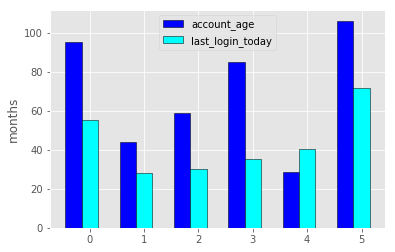

In [104]:
# # Make a fake dataset
# height = center_person.ACCOUNT_AGE_MONTHS
# bars = center_person.index
# y_pos = np.arange(len(bars))
# plt.barh(y_pos, height, color=(0.1, 0.2, 0.5, 0.3))#,edgecolor='blue')
# plt.xticks(y_pos, bars)
# plt.show()




In [81]:
from pandas.tools.plotting import parallel_coordinates

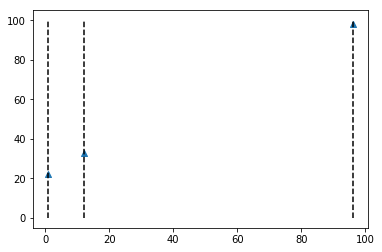

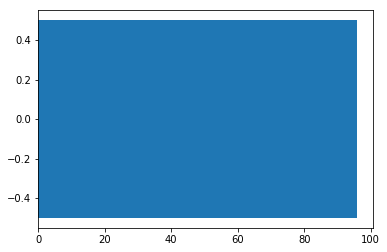

In [57]:
plt.scatter((1,12,96),(22,33,98),marker='^')
plt.vlines(1,0,100,linestyles='--')
plt.vlines(12,0,100,linestyles='--')
plt.vlines(96,0,100,linestyles='--')
plt.show()

plt.barh(0,96,1)
plt.scatter(55,0,marker="*",c='r',edgecolors='b')
plt.show()

In [85]:
parallel_coordinates(ndf_ww[['FIRST_DAY_DONATION_TOTAL',
       'FIRST_DAY_DEPOSIT_TOTAL', 'FIRST_DAY_LOAN_PURCHASE_TOTAL']].values, ndf_ww['clustering_6d'].values, colormap=plt.get_cmap("Set2"))
plt.show()


AttributeError: 'numpy.ndarray' object has no attribute 'drop_duplicates'



### 4.2 3D Viz

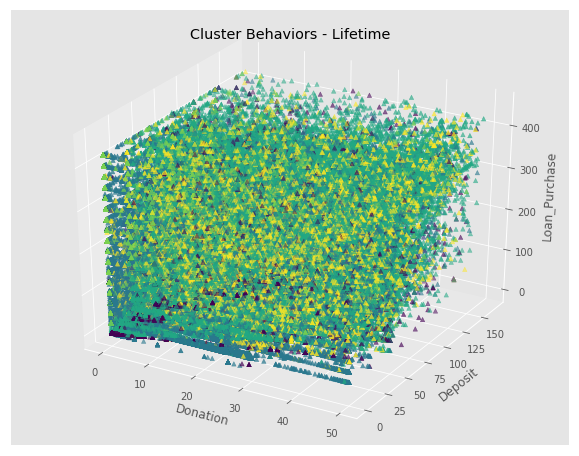

In [29]:
plot_3D_kmeans(ndf_ww[['LIFETIME_DONATION_TOTAL',
       'LIFETIME_DEPOSIT_TOTAL', 'LIFETIME_ACCOUNT_LOAN_PURCHASE_TOTAL']].values,ndf_ww['clustering_6d'],"Donation","Deposit","Loan_Purchase","Cluster Behaviors - Lifetime")

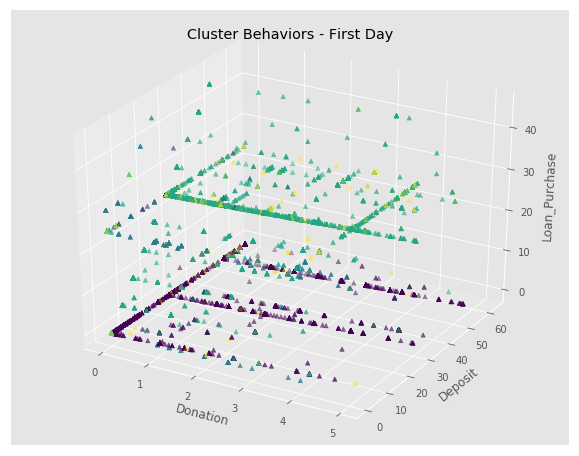

In [28]:
plot_3D_kmeans(ndf_ww[['FIRST_DAY_DONATION_TOTAL',
       'FIRST_DAY_DEPOSIT_TOTAL', 'FIRST_DAY_LOAN_PURCHASE_TOTAL']].values,ndf_ww['clustering_6d'],"Donation","Deposit","Loan_Purchase","Cluster Behaviors - First Day")

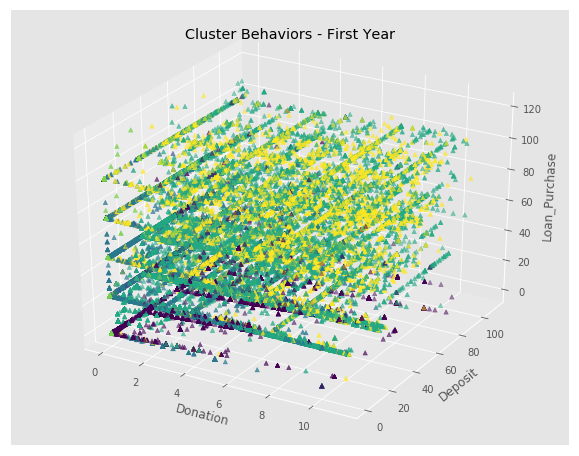

In [27]:
plot_3D_kmeans(ndf_ww[['FIRST_YEAR_DONATION_TOTAL',
       'FIRST_YEAR_DEPOSIT_TOTAL', 'FIRST_YEAR_LOAN_PURCHASE_TOTAL']].values,ndf_ww['clustering_6d'],"Donation","Deposit","Loan_Purchase","Cluster Behaviors - First Year")

###  4.2 radar plot to compare on different aspects

In [9]:
radar1 = cluster_mean[['LIFETIME_DONATION_TOTAL',
       'LIFETIME_DEPOSIT_TOTAL', 'LIFETIME_ACCOUNT_LOAN_PURCHASE_TOTAL']]

In [33]:
radar1_plus = cluster_mean[['LIFETIME_DONATION_TOTAL',
       'LIFETIME_DEPOSIT_TOTAL', 'LIFETIME_ACCOUNT_LOAN_PURCHASE_TOTAL','ave_loan_purchase_per_month']]

In [201]:
radar1_scaled_plus = scaled_cluster_mean[['LIFETIME_DONATION_TOTAL',
       'LIFETIME_DEPOSIT_TOTAL', 'LIFETIME_ACCOUNT_LOAN_PURCHASE_TOTAL','ave']]

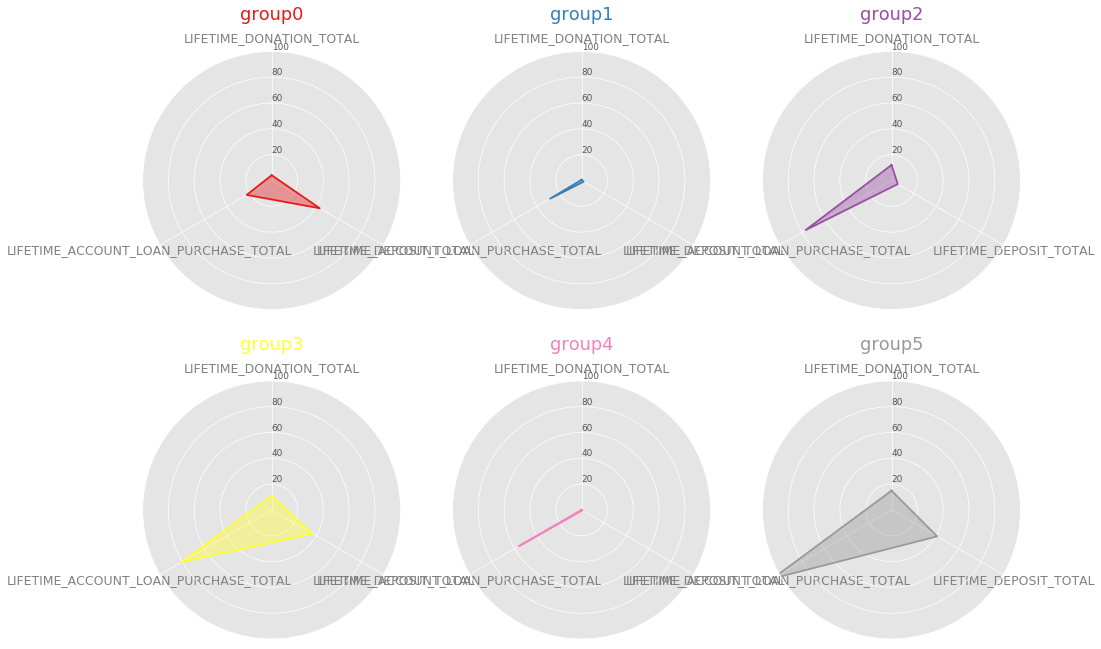

In [26]:
plot_radar(radar1,ylim=(0,100))

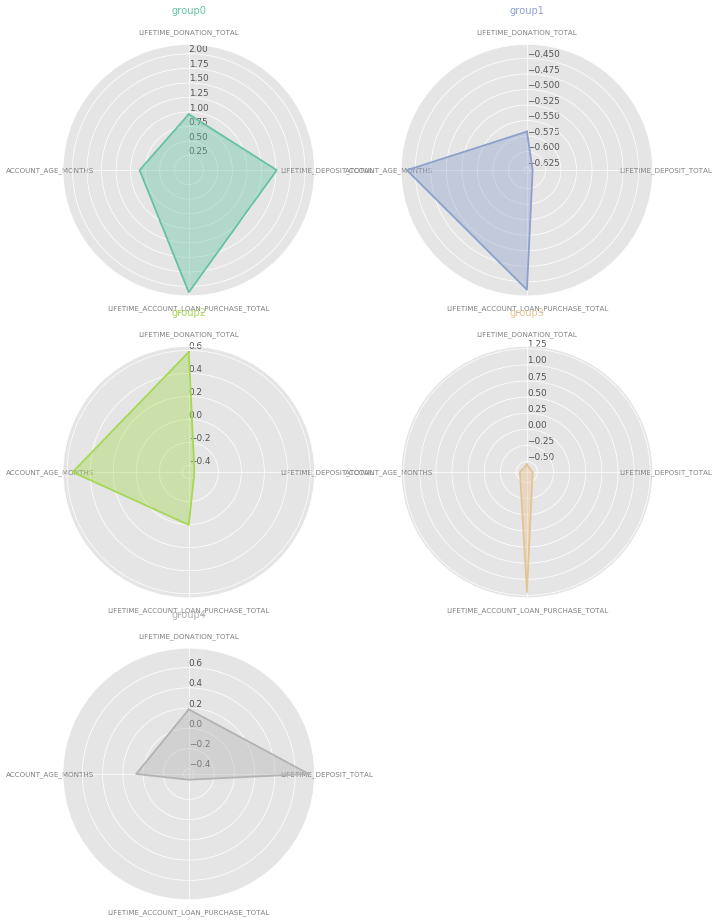

In [202]:
plot_radar(radar1_scaled_plus)

In [214]:
normal['VINTAGE_MONTH'][normal['VINTAGE_MONTH'] >201705]

1499446    201706
1499447    201706
1499448    201706
1499451    201706
1499452    201706
1499453    201707
1499455    201707
1499503    201706
1499504    201706
1499505    201706
1499506    201706
1499507    201706
1499509    201706
1499510    201706
1499511    201707
1499513    201707
1499514    201707
1499548    201706
1499549    201706
1499551    201706
1499552    201706
1499553    201706
1499555    201706
1499556    201706
1499557    201706
1499558    201707
1499559    201707
1499565    201707
1499601    201706
1499602    201706
1499604    201706
1499605    201706
1499606    201706
1499607    201706
1499608    201706
1499609    201707
1499611    201707
1499674    201706
1499675    201706
1499676    201706
1499677    201706
1499678    201706
1499679    201707
1499683    201706
1499727    201706
1499728    201706
1499730    201706
1499731    201706
1499733    201706
1499736    201707
1499738    201707
1499739    201707
1499776    201706
1499778    201707
1499779    201707
1499780   

In [222]:
cluster_mean[['ACCOUNT_AGE_MONTHS','LIFETIME_ACCOUNT_LOAN_PURCHASE_TOTAL','lifetime_ave_tip_rate','LIFETIME_DEPOSIT_TOTAL','LIFETIME_DONATION_TOTAL']]

,ACCOUNT_AGE_MONTHS,LIFETIME_ACCOUNT_LOAN_PURCHASE_TOTAL,lifetime_ave_tip_rate,LIFETIME_DEPOSIT_TOTAL,LIFETIME_DONATION_TOTAL
cluster,,,,,
0,89.736335,207.396586,0.091504,51.410358,15.941097
1,46.397894,30.933234,0.005408,0.198000,0.049243
2,79.810731,61.498521,16.667554,5.318899,12.039250
3,42.440040,144.770449,0.002059,1.309590,0.293250
4,63.453254,33.900075,51.629428,32.736870,7.892545


In [88]:
radar1_scaled = scaled_cluster_mean.iloc[:,4:7]

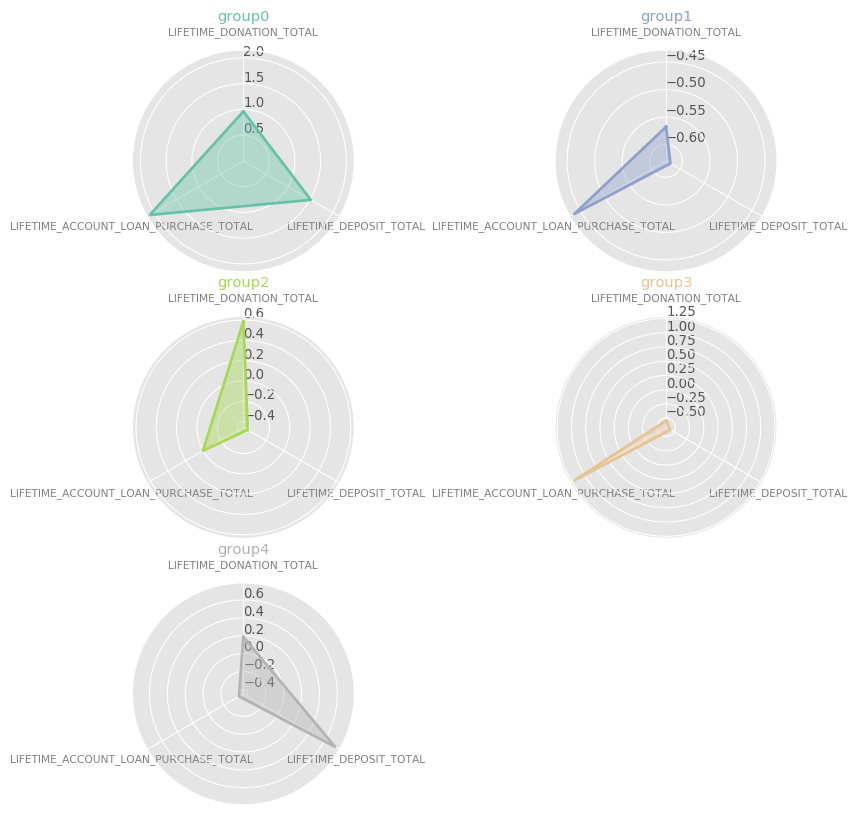

In [89]:
# initialize the figure
my_dpi=96
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(radar1_scaled.index))

for row in range(0, len(radar1_scaled.index)):
    make_spider(df=radar1_scaled, row=row, title='group{}'.format(row), color=my_palette(row))

### First Year

In [38]:
radar2 = cluster_mean[['FIRST_YEAR_DONATION_TOTAL',"FIRST_YEAR_DEPOSIT_TOTAL",'FIRST_YEAR_LOAN_PURCHASE_TOTAL']]

In [96]:
radar2_scaled = scaled_cluster_mean[['FIRST_YEAR_DONATION_TOTAL',"FIRST_YEAR_DEPOSIT_TOTAL",'FIRST_YEAR_LOAN_PURCHASE_TOTAL']]

In [5]:
plot_radar(radar2,ylim=(0,50))

NameError: name 'radar2' is not defined

In [127]:
radar2_plus = cluster_mean[['FIRST_YEAR_DONATION_TOTAL',"FIRST_YEAR_DEPOSIT_TOTAL",'FIRST_YEAR_LOAN_PURCHASE_TOTAL',"FIRST_YEAR_EMAIL_REFERRAL_DONATION_TOTAL",'FIRST_YEAR_EMAIL_REFERRAL_LOAN_PURCHASE_TOTAL']]

In [128]:
radar2_scaled_plus = scaled_cluster_mean[['FIRST_YEAR_DONATION_TOTAL',"FIRST_YEAR_DEPOSIT_TOTAL",'FIRST_YEAR_LOAN_PURCHASE_TOTAL',"FIRST_YEAR_EMAIL_REFERRAL_DONATION_TOTAL",'FIRST_YEAR_EMAIL_REFERRAL_LOAN_PURCHASE_TOTAL']]

In [ ]:
ndf

### First Day

In [19]:
radar3 = cluster_mean[['FIRST_DAY_DONATION_TOTAL',"FIRST_DAY_DEPOSIT_TOTAL",'FIRST_DAY_LOAN_PURCHASE_TOTAL']]

In [101]:
radar3_scaled = scaled_cluster_mean[['FIRST_DAY_DONATION_TOTAL',"FIRST_DAY_DEPOSIT_TOTAL",'FIRST_DAY_LOAN_PURCHASE_TOTAL']]

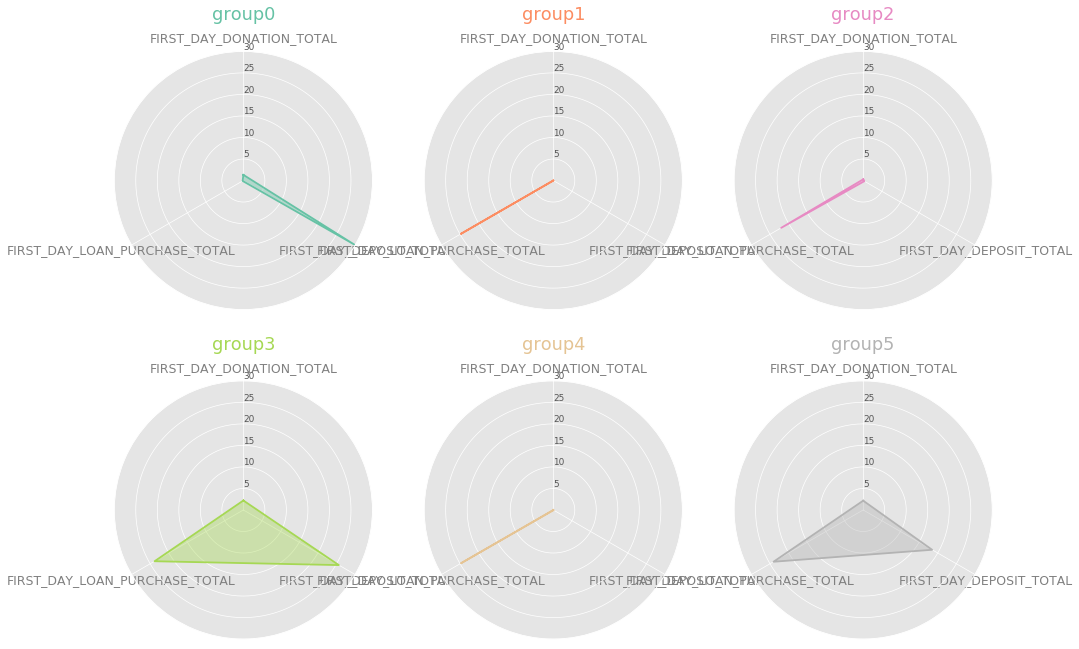

In [20]:
plot_radar(radar3,ylim=(0,30))

In [111]:
list(cluster_mean.columns)

['ACCOUNT_AGE_MONTHS',
 'IS_CORPORATE_CAMPAIGN_USER',
 'IS_FREE_TRIAL_USER',
 'IS_INACTIVE_CREDIT_DONOR',
 'LIFETIME_DONATION_TOTAL',
 'LIFETIME_DEPOSIT_TOTAL',
 'LIFETIME_ACCOUNT_LOAN_PURCHASE_TOTAL',
 'LIFETIME_PROXY_LOAN_PURCHASE_TOTAL',
 'LIFETIME_LENDER_WEIGHTED_AVERAGE_LOAN_TERM',
 'FIRST_YEAR_DEPOSIT_TOTAL',
 'FIRST_YEAR_LOAN_PURCHASE_TOTAL',
 'FIRST_YEAR_DONATION_TOTAL',
 'FIRST_YEAR_EMAIL_REFERRAL_DONATION_TOTAL',
 'FIRST_YEAR_EMAIL_REFERRAL_LOAN_PURCHASE_TOTAL',
 'FIRST_DAY_DEPOSIT_TOTAL',
 'FIRST_DAY_LOAN_PURCHASE_TOTAL',
 'FIRST_DAY_DONATION_TOTAL',
 'FIRST_YEAR_DEPOSIT_OCCASION_NUM',
 'FIRST_YEAR_LOAN_PURCHASE_OCCASION_NUM',
 'FIRST_YEAR_DONATION_OCCASION_NUM',
 'FIRST_YEAR_EMAIL_REFERRAL_DONATION_OCCASION_NUM',
 'FIRST_YEAR_EMAIL_REFERRAL_LOAN_PURCHASE_OCCASION_NUM',
 'NUM_TEAM_MEMBERSHIPS',
 'NUM_TEAM_LOANS',
 'NUM_TEAM_MESSAGES',
 'NUM_LOAN_COMMENTS',
 'NUM_JOURNAL_COMMENTS',
 'NUM_STATEMENT_COMMENTS',
 'NUM_DISTINCT_COUNTRIES_LENT_TO',
 'NUM_AFRICA_LOANS',
 'NUM_ASIA_L

In [43]:
radar4 = cluster_mean[['IS_CORPORATE_CAMPAIGN_USER','IS_FREE_TRIAL_USER', 'IS_INACTIVE_CREDIT_DONOR']]

In [109]:
radar4_scaled = scaled_cluster_mean[['IS_CORPORATE_CAMPAIGN_USER','IS_FREE_TRIAL_USER', 'IS_INACTIVE_CREDIT_DONOR']]

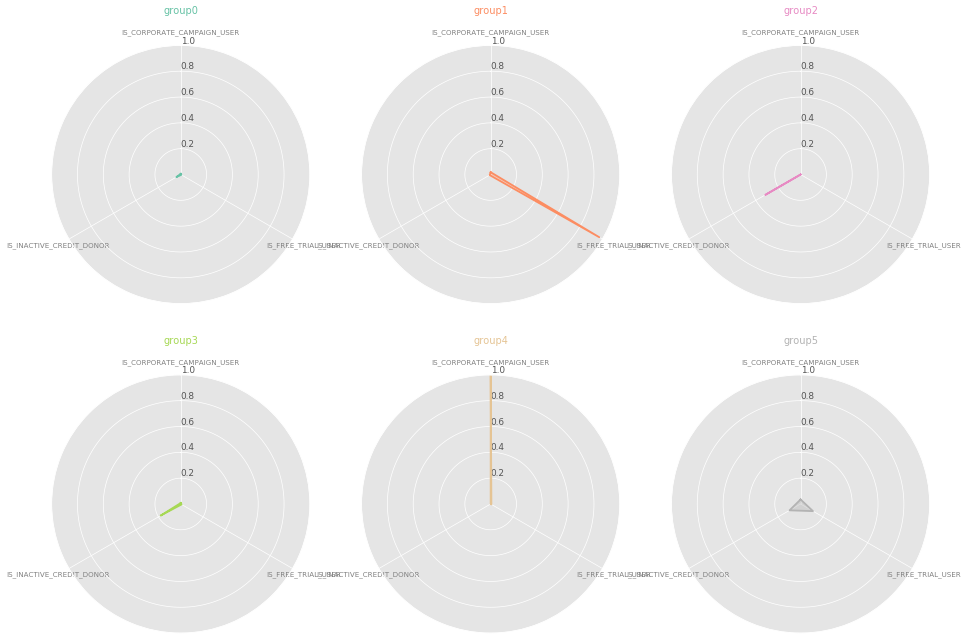

In [91]:
plot_radar(radar4,ylim=(0,1))

In [45]:
radar5 = cluster_mean[['NUM_TEAM_MEMBERSHIPS',
 'NUM_TEAM_LOANS',
 'NUM_TEAM_MESSAGES']]

In [113]:
radar5_scaled = scaled_cluster_mean[['NUM_TEAM_MEMBERSHIPS',
 'NUM_TEAM_LOANS',
 'NUM_TEAM_MESSAGES']]

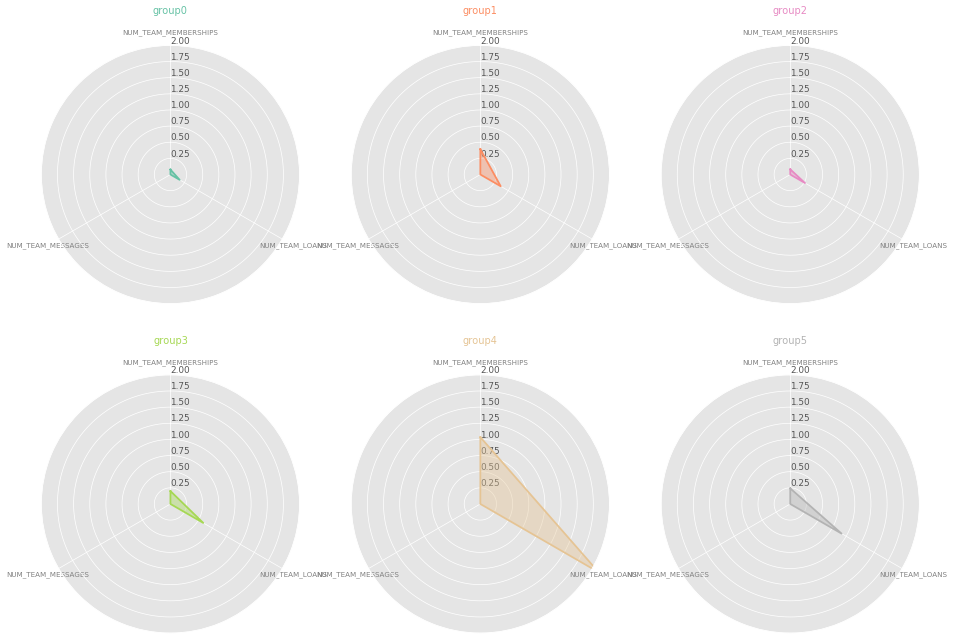

In [94]:
plot_radar(radar5,ylim=(0,2))

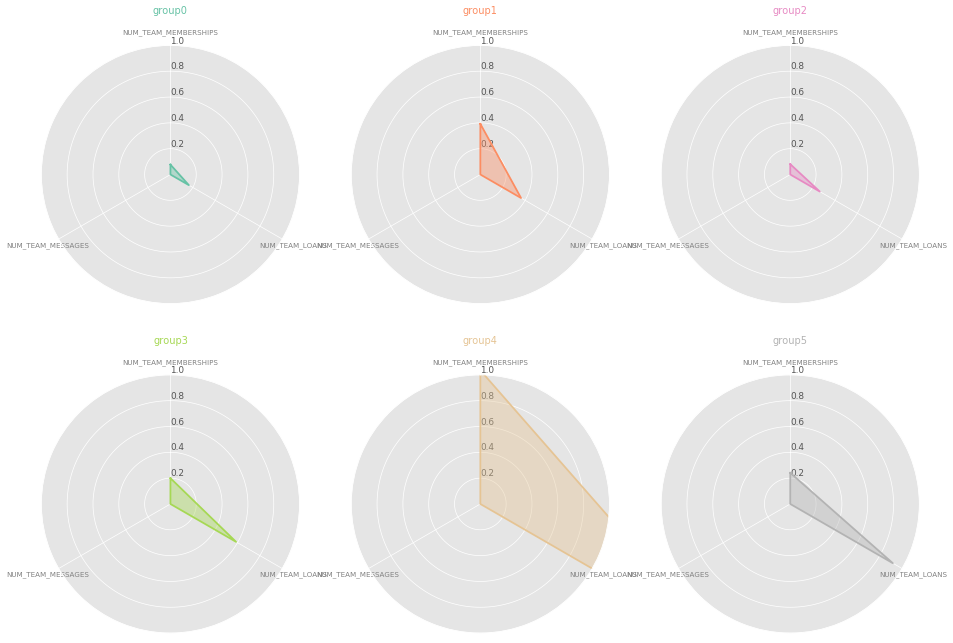

In [58]:
plot_radar(radar5)

In [59]:
radar6 = cluster_mean[['NUM_LOAN_COMMENTS',
 'NUM_JOURNAL_COMMENTS',
 'NUM_STATEMENT_COMMENTS']]


In [117]:
radar6_scaled = scaled_cluster_mean[['NUM_LOAN_COMMENTS',
 'NUM_JOURNAL_COMMENTS',
 'NUM_STATEMENT_COMMENTS']]


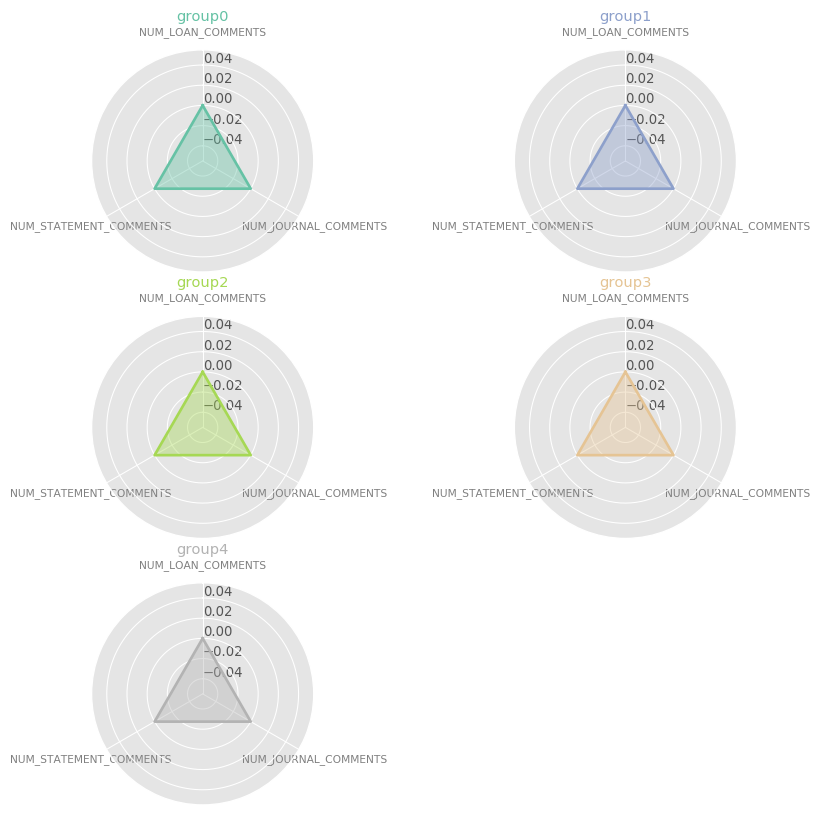

In [118]:
# initialize the figure
my_dpi=96
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(radar6_scaled.index))

for row in range(0, len(radar6_scaled.index)):
    make_spider(df=radar6_scaled, row=row, title='group{}'.format(row), color=my_palette(row))

In [64]:
radar7 = cluster_mean[['FIRST_YEAR_DEPOSIT_OCCASION_NUM',
 'FIRST_YEAR_LOAN_PURCHASE_OCCASION_NUM',
 'FIRST_YEAR_DONATION_OCCASION_NUM',
 'FIRST_YEAR_EMAIL_REFERRAL_DONATION_OCCASION_NUM',
 'FIRST_YEAR_EMAIL_REFERRAL_LOAN_PURCHASE_OCCASION_NUM'
 ]]

In [121]:
radar7_scaled = scaled_cluster_mean[['FIRST_YEAR_DEPOSIT_OCCASION_NUM',
 'FIRST_YEAR_LOAN_PURCHASE_OCCASION_NUM',
 'FIRST_YEAR_DONATION_OCCASION_NUM',
 'FIRST_YEAR_EMAIL_REFERRAL_DONATION_OCCASION_NUM',
 'FIRST_YEAR_EMAIL_REFERRAL_LOAN_PURCHASE_OCCASION_NUM'
 ]]

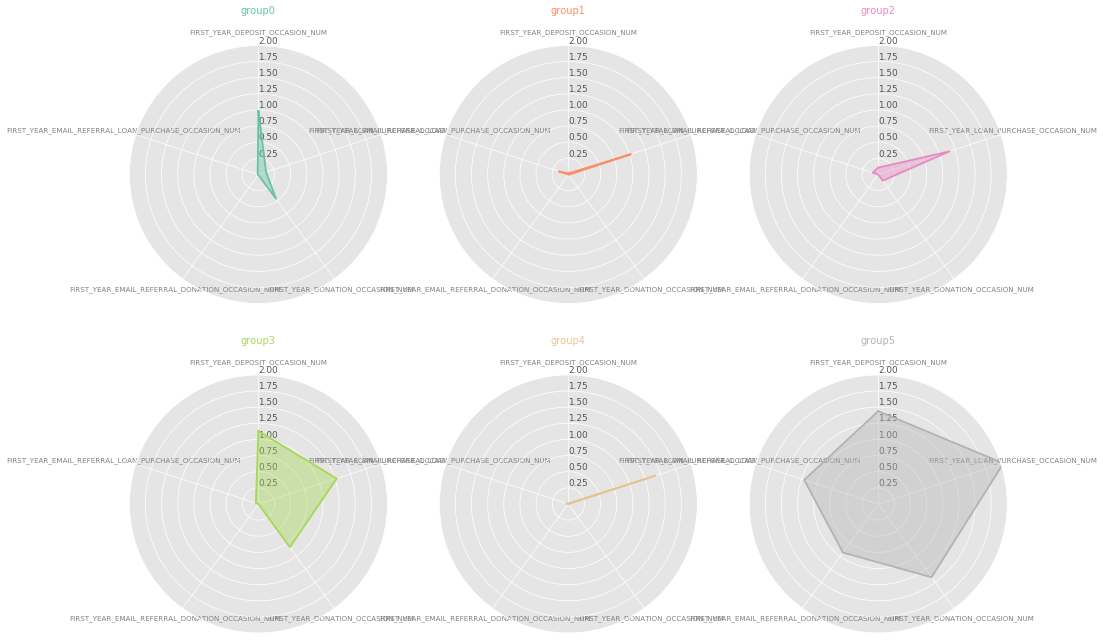

In [68]:
plot_radar(radar7,ylim=(0,2))

In [131]:
list(cluster_mean.filter(regex=("FIRST_TRANSACTION_REFERRAL")))

['FIRST_TRANSACTION_REFERRAL_giftcard',
 'FIRST_TRANSACTION_REFERRAL_invited',
 'FIRST_TRANSACTION_REFERRAL_invited_team',
 'FIRST_TRANSACTION_REFERRAL_marketing',
 'FIRST_TRANSACTION_REFERRAL_online_ad',
 'FIRST_TRANSACTION_REFERRAL_search',
 'FIRST_TRANSACTION_REFERRAL_social',
 'FIRST_TRANSACTION_REFERRAL_system_email',
 'FIRST_TRANSACTION_REFERRAL_unknown',
 'FIRST_TRANSACTION_REFERRAL_video_site']

In [69]:
radar8 = cluster_mean[list(cluster_mean.filter(regex=("FIRST_TRANSACTION_REFERRAL")))]

In [138]:
normal['cluster'] = y

In [141]:
normal.groupby(['cluster','FIRST_TRANSACTION_REFERRAL']).count().iloc[:,0]

cluster  FIRST_TRANSACTION_REFERRAL
0        direct                          5197
         giftcard                       23485
         invited                        13914
         invited_team                    1046
         marketing                       1752
         online_ad                        355
         search                          4278
         social                           893
         system_email                     302
         unknown                        47976
         video_site                        87
1        direct                        120386
         giftcard                        5659
         invited                        94858
         invited_team                   20464
         marketing                       5798
         online_ad                        355
         search                          3002
         social                          2574
         system_email                    1317
         unknown                       13909

In [153]:
radar8_scaled = scaled_cluster_mean[list(cluster_mean.filter(regex=("FIRST_TRANSACTION_REFERRAL")))]

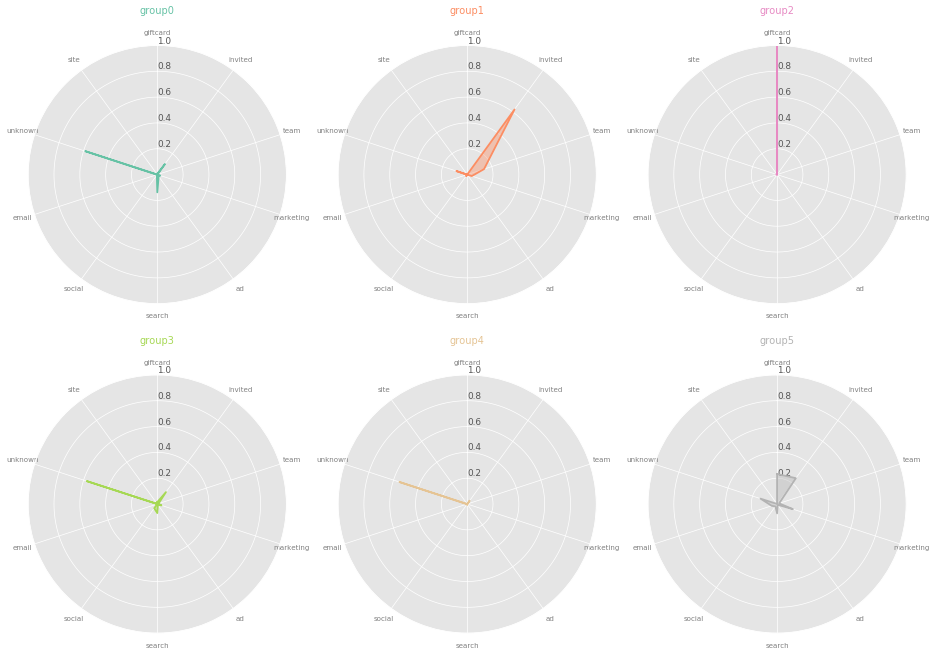

In [70]:
plot_radar(radar8,category=True,ylim=(0,))

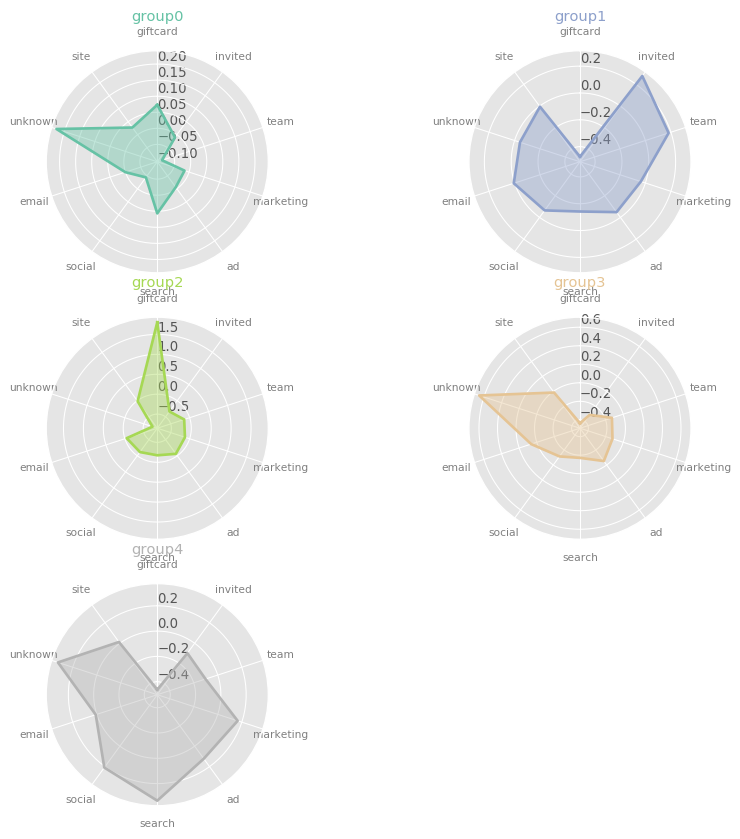

In [154]:
plot_radar(radar8_scaled,category=True)

In [71]:
radar9 = cluster_mean[list(cluster_mean.filter(regex=("FIRST_TIME_DEPOSITOR_REPORTING_CATEGORY")))]

In [156]:
radar9_scaled = scaled_cluster_mean[list(cluster_mean.filter(regex=("FIRST_TIME_DEPOSITOR_REPORTING_CATEGORY")))]

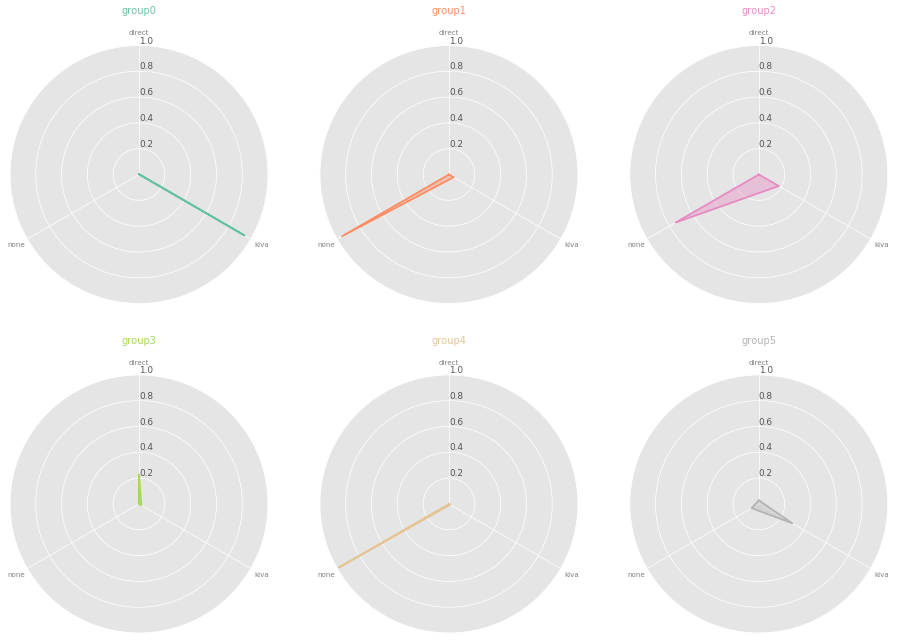

In [72]:
plot_radar(radar9,category=True)

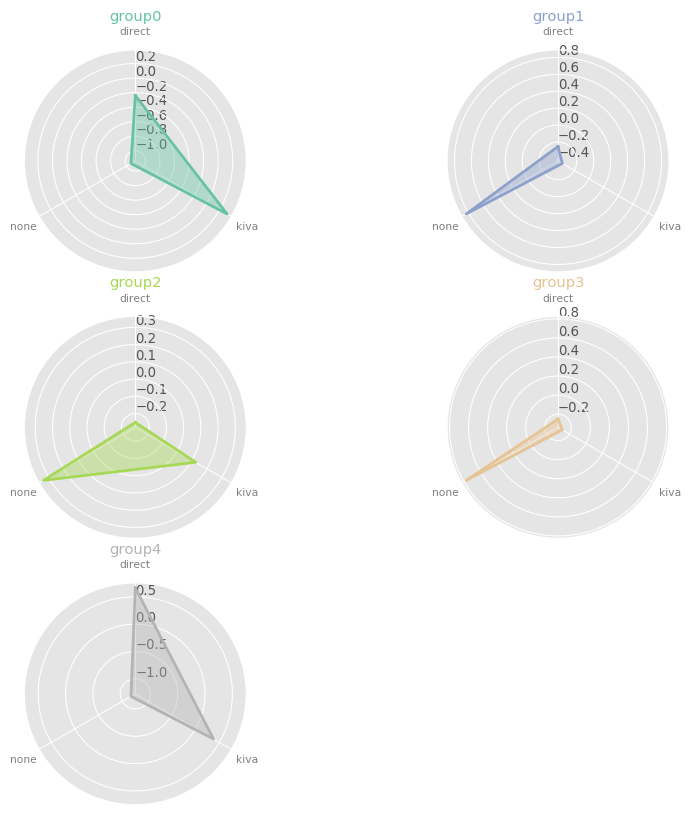

In [158]:
plot_radar(radar9_scaled,category=True)

In [162]:
list(cluster_mean.filter(regex=("NUM_BUNDLE")))

['NUM_BUNDLE_GREEN_LOANS',
 'NUM_BUNDLE_HIGHER_ED_LOANS',
 'NUM_BUNDLE_ISLAMIC_FINANCE_LOANS',
 'NUM_BUNDLE_YOUTH_LOANS',
 'NUM_BUNDLE_STARTUP_LOANS',
 'NUM_BUNDLE_WATER_LOANS',
 'NUM_BUNDLE_VULNERABLE_LOANS',
 'NUM_BUNDLE_FAIR_TRADE_LOANS',
 'NUM_BUNDLE_MOBILE_TECH_LOANS',
 'NUM_BUNDLE_RURAL_LOANS',
 'NUM_BUNDLE_UNDERFUNDED_LOANS',
 'NUM_BUNDLE_CONFLICT_ZONE_LOANS',
 'NUM_BUNDLE_JOB_CREATION_SME_LOANS',
 'NUM_BUNDLE_GROWING_BUSINESSES_LOANS',
 'NUM_BUNDLE_HEALTH_LOANS',
 'NUM_BUNDLE_DISASTER_RECOVERY_LOANS',
 'NUM_BUNDLE_INNOVATIVE_LOANS',
 'NUM_BUNDLE_REFUGEE_LOANS',
 'NUM_BUNDLE_SOCIAL_ENTERPRISE_LOANS',
 'NUM_BUNDLE_CLEAN_ENERGY_LOANS',
 'NUM_BUNDLE_SOLAR_LOANS']

In [74]:
radar11 = cluster_mean[list(cluster_mean.filter(regex=("FIRST_BASKET_CATEGORY_Depositor")))]
radar12 = cluster_mean[['ACCOUNT_AGE_MONTHS','last_login_today_months']]
radar13 = cluster_mean[['LIFETIME_LENDER_WEIGHTED_AVERAGE_LOAN_TERM']]
radar14 = cluster_mean[['lifetime_ave_donation_rate']] 

In [73]:
cluster_mean.columns

Index(['ACCOUNT_AGE_MONTHS', 'IS_CORPORATE_CAMPAIGN_USER',
       'IS_FREE_TRIAL_USER', 'IS_INACTIVE_CREDIT_DONOR',
       'LIFETIME_DONATION_TOTAL', 'LIFETIME_DEPOSIT_TOTAL',
       'LIFETIME_ACCOUNT_LOAN_PURCHASE_TOTAL',
       'LIFETIME_PROXY_LOAN_PURCHASE_TOTAL',
       'LIFETIME_LENDER_WEIGHTED_AVERAGE_LOAN_TERM',
       'FIRST_YEAR_DEPOSIT_TOTAL', 'FIRST_YEAR_LOAN_PURCHASE_TOTAL',
       'FIRST_YEAR_DONATION_TOTAL', 'FIRST_YEAR_EMAIL_REFERRAL_DONATION_TOTAL',
       'FIRST_YEAR_EMAIL_REFERRAL_LOAN_PURCHASE_TOTAL',
       'FIRST_DAY_DEPOSIT_TOTAL', 'FIRST_DAY_LOAN_PURCHASE_TOTAL',
       'FIRST_DAY_DONATION_TOTAL', 'FIRST_YEAR_DEPOSIT_OCCASION_NUM',
       'FIRST_YEAR_LOAN_PURCHASE_OCCASION_NUM',
       'FIRST_YEAR_DONATION_OCCASION_NUM',
       'FIRST_YEAR_EMAIL_REFERRAL_DONATION_OCCASION_NUM',
       'FIRST_YEAR_EMAIL_REFERRAL_LOAN_PURCHASE_OCCASION_NUM',
       'NUM_TEAM_MEMBERSHIPS', 'NUM_TEAM_LOANS', 'NUM_TEAM_MESSAGES',
       'NUM_LOAN_COMMENTS', 'NUM_JOURNAL_COMMENTS', 'NU

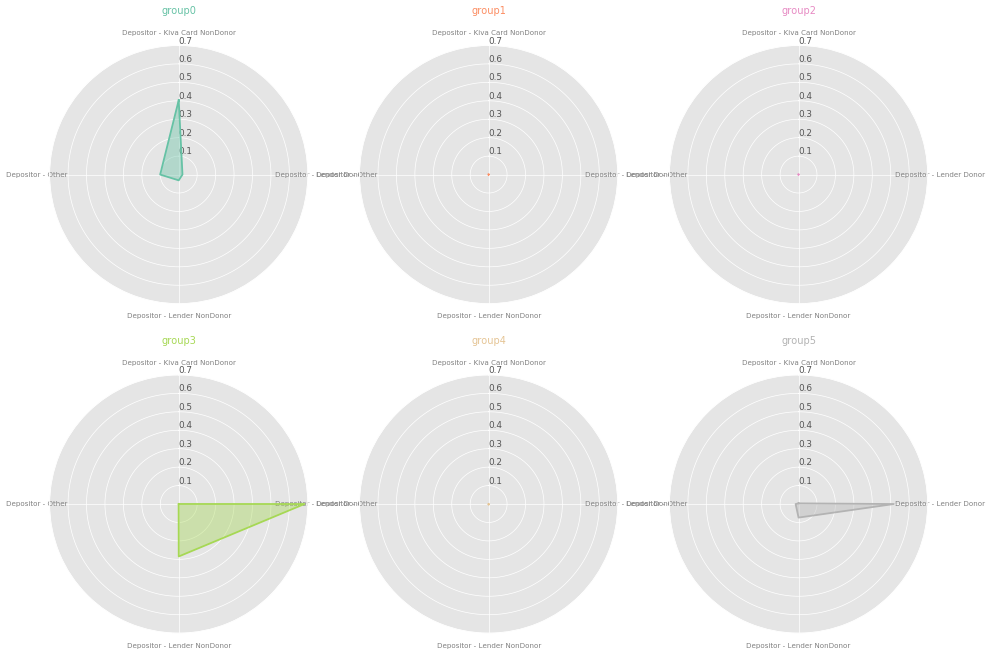

In [79]:
plot_radar(radar11,category=True, ylim=(0,0.7))

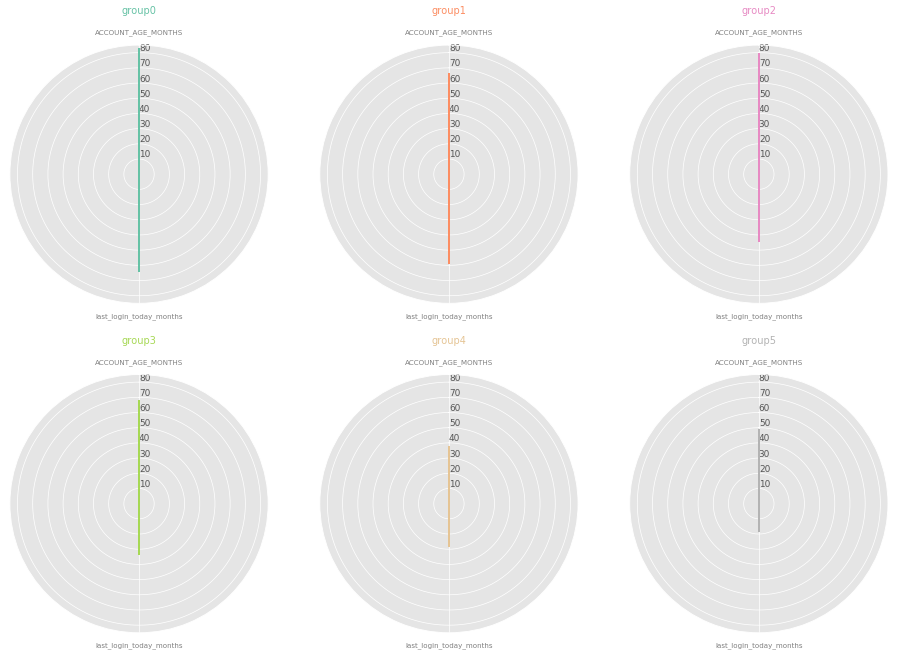

In [83]:
plot_radar(radar12,ylim=(0,85))

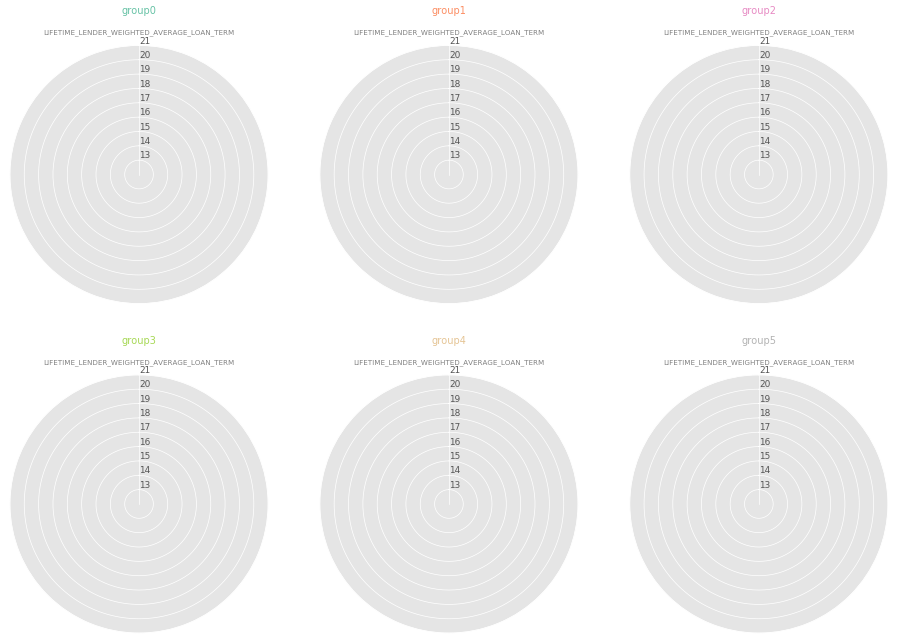

In [87]:
plot_radar(radar13,ylim=(12,21))

In [88]:
cluster_mean["lifetime_ave_donation_rate"]

clustering_6d
0    2.003217
1    0.009982
2    0.427357
3    0.215344
4    0.001003
5    0.234784
Name: lifetime_ave_donation_rate, dtype: float64